In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch . nn as nn
import torch . optim as optim
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [3]:
Train_data = pd.read_csv('train_Int_MM_PCA10.csv')
Validation_data = pd.read_csv('valid_Int_MM_PCA10.csv')
Test_data = pd.read_csv('test_Int_MM_PCA10.csv')
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PC1           12000 non-null  float64
 1   PC2           12000 non-null  float64
 2   PC3           12000 non-null  float64
 3   PC4           12000 non-null  float64
 4   PC5           12000 non-null  float64
 5   PC6           12000 non-null  float64
 6   PC7           12000 non-null  float64
 7   PC8           12000 non-null  float64
 8   PC9           12000 non-null  float64
 9   PC10          12000 non-null  float64
 10  LoanApproved  12000 non-null  int64  
 11  RiskScore     12000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [4]:
Train_data.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.412651  0.084070  0.282497 -0.393422 -0.096729  0.393599 -0.103436   
1 -0.177765  0.031694  0.220924  0.010606 -0.042096 -0.534258  0.271329   
2  0.075381 -0.140127 -0.233611  0.085018 -0.253664 -0.209153 -0.191823   
3  0.598926 -0.202996  0.054273 -0.085612  0.062239  0.238759 -0.549828   
4  0.089788 -0.029277  0.082159 -0.036563 -0.274682 -0.538689 -0.136742   

        PC8       PC9      PC10  LoanApproved  RiskScore  
0  0.098373 -0.313217 -0.013963             0   0.402174  
1  0.394487 -0.065318  0.194361             0   0.384058  
2  0.494242 -0.014001 -0.162745             0   0.438406  
3 -0.151805  0.010526  0.218146             1   0.086957  
4 -0.148616  0.186355 -0.124186             0   0.438406

In [6]:
X_training = Train_data.drop('LoanApproved',axis=1)
X_training = Train_data.drop('RiskScore',axis=1)
y_training = Train_data['LoanApproved']

In [7]:
y_training.min()

0

In [8]:
X_validation = Validation_data.drop('LoanApproved',axis=1)
X_validation = Validation_data.drop('RiskScore',axis=1)
y_validation = Validation_data['LoanApproved']

In [9]:
X_testing = Test_data.drop('LoanApproved',axis=1)
X_testing = Test_data.drop('RiskScore',axis=1)
y_testing = Test_data['LoanApproved']

In [10]:
class SingleLayer(nn.Module):
    def __init__(self, input_size, hidden1):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

In [11]:
X_training = X_training.values
y_training = y_training.values
X_validation = X_validation.values
y_validation = y_validation.values
X_testing = X_testing.values
y_testing = y_testing.values

In [12]:
print(y_training)

[0 0 0 ... 1 0 0]


In [13]:
X_train, y_train = torch.tensor(X_training, dtype=torch.float32), torch.tensor(y_training, dtype=torch.float32).view(-1, 1)
X_val, y_val = torch.tensor(X_validation, dtype=torch.float32), torch.tensor(y_validation, dtype=torch.float32).view(-1, 1)
X_test, y_test = torch.tensor(X_testing, dtype=torch.float32), torch.tensor(y_testing, dtype=torch.float32).view(-1, 1)

In [14]:
print(X_training.shape)

(12000, 11)


Training Losses are 
          0
0  0.601845
1  0.601058
2  0.600283
3  0.599519
4  0.598767
Validation Data
Confusion Matrix for hidden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


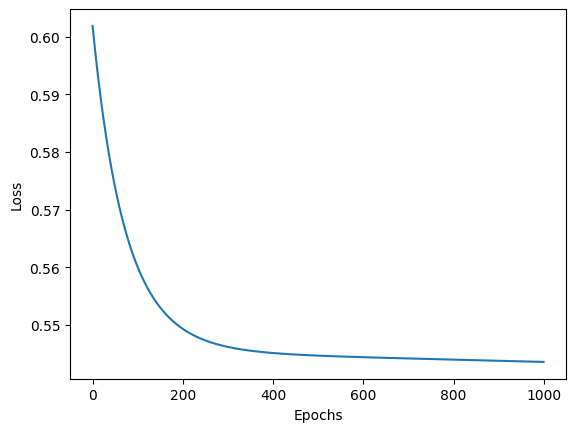

Training Losses are 
          0
0  0.633029
1  0.631143
2  0.629302
3  0.627505
4  0.625749
Validation Data
Confusion Matrix for hidden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


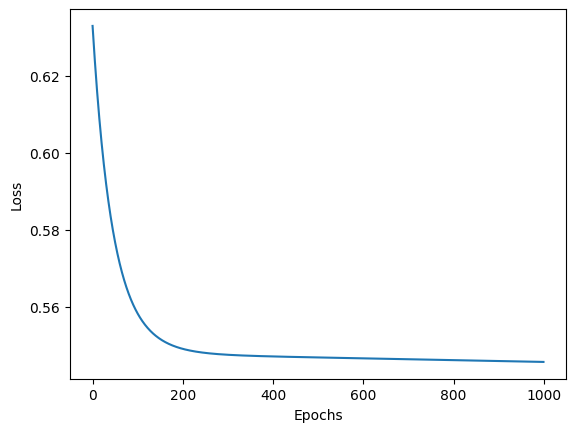

Training Losses are 
          0
0  0.626941
1  0.623801
2  0.620801
3  0.617933
4  0.615192
Validation Data
Confusion Matrix for hidden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


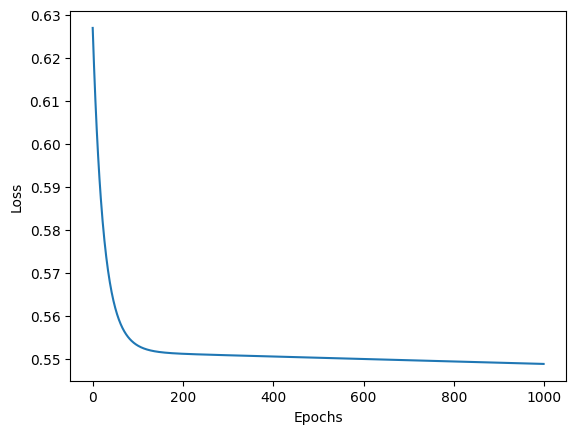

Training Losses are 
          0
0  0.638598
1  0.631941
2  0.625821
3  0.620194
4  0.615017
Validation Data
Confusion Matrix for hidden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


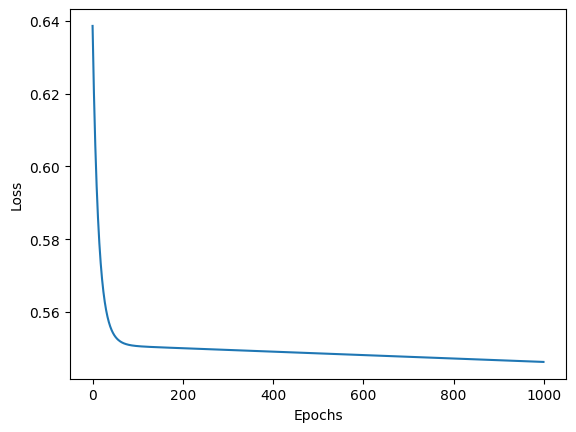

Training Losses are 
          0
0  0.721845
1  0.696301
2  0.674759
3  0.656588
4  0.641252
Validation Data
Confusion Matrix for hidden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0

Test Data
Confusion Matrix for hiden layer 128
[[3044    0]
 [ 956    0]]
Accuracy: 0.761, Precision: 0.0, Recall: 0.0, F1-score: 0.0



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


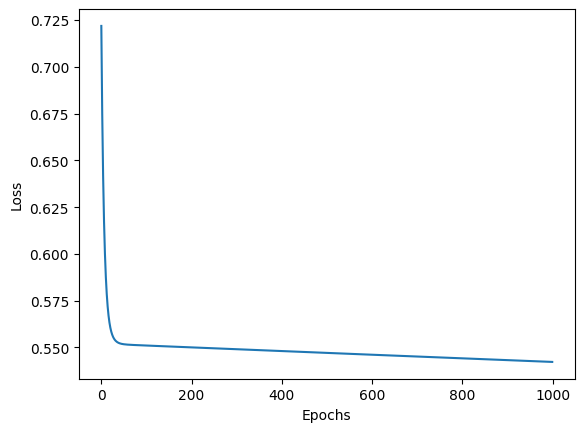

Best accuracy for test data is 0.761 for degree 8


In [15]:
nuerons = [8,16,32,64,128]
min_loss = 0
best_degree = 1000
for nueron in nuerons:
  model = SingleLayer(11,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss:
    min_loss = acc
    best_degree = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:}, Precision: {precision:}, Recall: {recall:}, F1-score: {f1:}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss} for degree {best_degree}")

Training Losses are 
          0
0  0.686350
1  0.684822
2  0.683302
3  0.681791
4  0.680287
Validation Data
Confusion Matrix for hidden layer 8
[[3041    3]
 [ 936   20]]
Accuracy: 0.7652, Precision: 0.8696, Recall: 0.0209, F1-score: 0.0409

Test Data
Confusion Matrix for hiden layer 8
[[3042    2]
 [ 933   23]]
Accuracy: 0.7662, Precision: 0.9200, Recall: 0.0241, F1-score: 0.0469



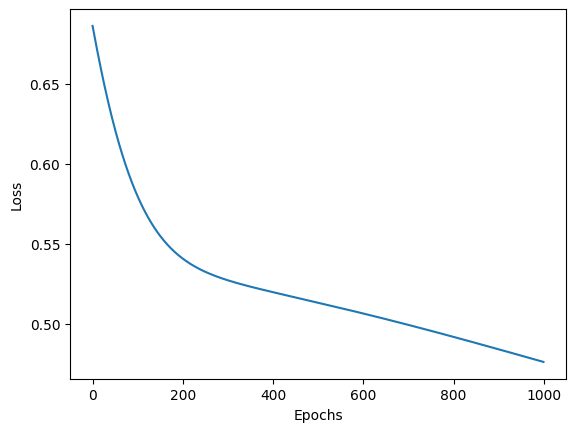

Training Losses are 
          0
0  0.903380
1  0.899373
2  0.895390
3  0.891429
4  0.887493
Validation Data
Confusion Matrix for hidden layer 16
[[3042    2]
 [ 946   10]]
Accuracy: 0.7630, Precision: 0.8333, Recall: 0.0105, F1-score: 0.0207

Test Data
Confusion Matrix for hiden layer 16
[[3042    2]
 [ 943   13]]
Accuracy: 0.7638, Precision: 0.8667, Recall: 0.0136, F1-score: 0.0268



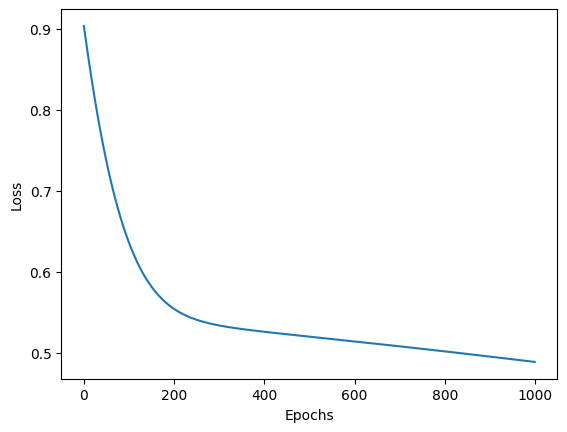

Training Losses are 
          0
0  0.656877
1  0.652814
2  0.648836
3  0.644944
4  0.641139
Validation Data
Confusion Matrix for hidden layer 32
[[2968   76]
 [ 676  280]]
Accuracy: 0.8120, Precision: 0.7865, Recall: 0.2929, F1-score: 0.4268

Test Data
Confusion Matrix for hiden layer 32
[[2980   64]
 [ 677  279]]
Accuracy: 0.8147, Precision: 0.8134, Recall: 0.2918, F1-score: 0.4296



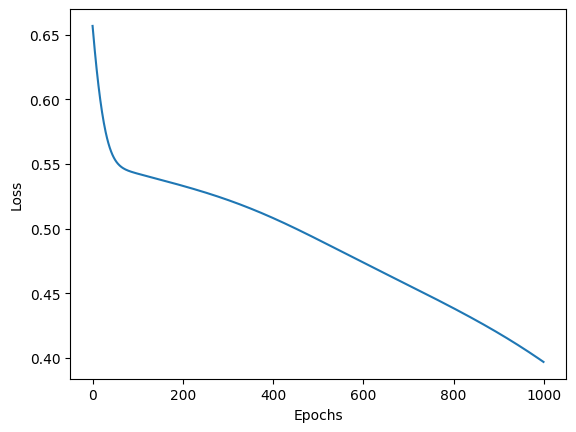

Training Losses are 
          0
0  0.676586
1  0.668226
2  0.660165
3  0.652408
4  0.644958
Validation Data
Confusion Matrix for hidden layer 64
[[3001   43]
 [ 434  522]]
Accuracy: 0.8808, Precision: 0.9239, Recall: 0.5460, F1-score: 0.6864

Test Data
Confusion Matrix for hiden layer 64
[[3012   32]
 [ 432  524]]
Accuracy: 0.8840, Precision: 0.9424, Recall: 0.5481, F1-score: 0.6931



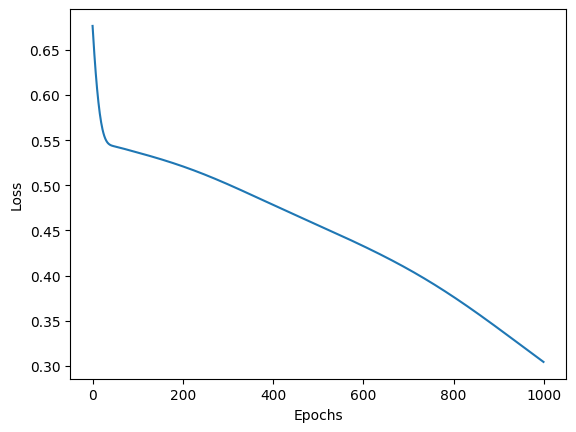

Training Losses are 
          0
0  0.564432
1  0.559624
2  0.555773
3  0.552850
4  0.550801
Validation Data
Confusion Matrix for hidden layer 128
[[2988   56]
 [  95  861]]
Accuracy: 0.9623, Precision: 0.9389, Recall: 0.9006, F1-score: 0.9194

Test Data
Confusion Matrix for hiden layer 128
[[3004   40]
 [ 102  854]]
Accuracy: 0.9645, Precision: 0.9553, Recall: 0.8933, F1-score: 0.9232



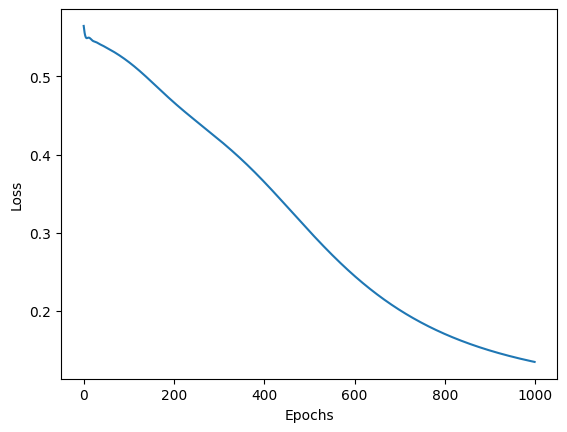

Best accuracy for test data is 0.9645 for degree 128


In [16]:
nuerons = [8,16,32,64,128]
min_loss_2 = 0
best_degree_2 = 1000
for nueron in nuerons:
  model = SingleLayer(11,nueron)
  criterion = nn.BCELoss() #Binary Classifiaction Loss
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  epochs=1000
  loss_arr=[]
  for i in range(epochs):
        optimizer.zero_grad()
        model.train()
        outputs=model(X_train)
        outputs = outputs.view(-1, 1)
        loss = criterion(outputs, y_train.float())
        loss_arr.append(loss.detach().numpy())
        loss.backward()
        optimizer.step()
  print("Training Losses are ")
  loss_df = pd.DataFrame(loss_arr)
  print(loss_df.head())
  y_val_pred=model(X_val)
  y_val_pred=(y_val_pred>0.5).float()
  cm = confusion_matrix(y_val, y_val_pred)
  acc = accuracy_score(y_val, y_val_pred)
  precision = precision_score(y_val.numpy(), y_val_pred.numpy())
  recall = recall_score(y_val.numpy(), y_val_pred.numpy())
  f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
  print("Validation Data")
  print(f"Confusion Matrix for hidden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  y_test_pred=model(X_test)
  y_test_pred=(y_test_pred>0.5).float()
  cm = confusion_matrix(y_test, y_test_pred)
  acc = accuracy_score(y_test, y_test_pred)
  if acc > min_loss_2:
    min_loss_2 = acc
    best_degree_2 = nueron
  precision = precision_score(y_test.numpy(), y_test_pred.numpy())
  recall = recall_score(y_test.numpy(), y_test_pred.numpy())
  f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
  print("Test Data")
  print(f"Confusion Matrix for hiden layer {nueron}")
  print(cm)
  print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
  plt.plot(range(epochs), loss_arr)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()
print(f"Best accuracy for test data is {min_loss_2} for degree {best_degree_2}")
  #HARDWARE PROBELM MIGHT WORK BETTER WITH A GOOD HARDWARE

In [17]:
class DoubleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.770099
1  0.766589
2  0.763138
3  0.759744
4  0.756406
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


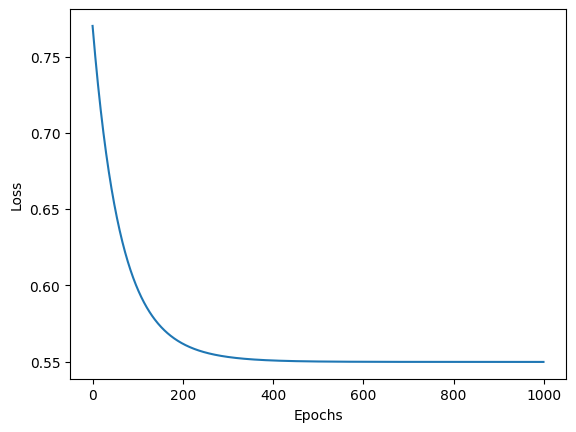

Training Losses are 
          0
0  0.953318
1  0.944488
2  0.935840
3  0.927371
4  0.919077
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


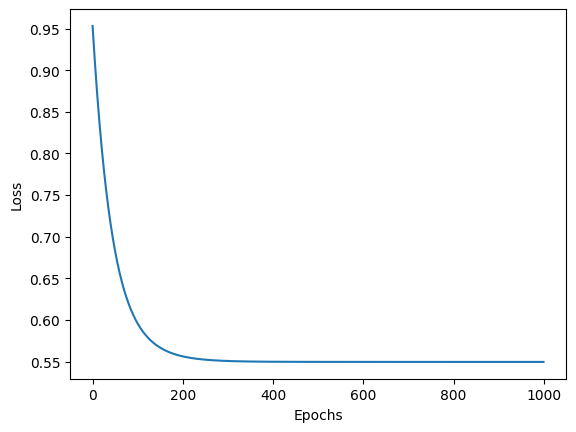

Training Losses are 
          0
0  0.700155
1  0.693549
2  0.687249
3  0.681239
4  0.675507
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


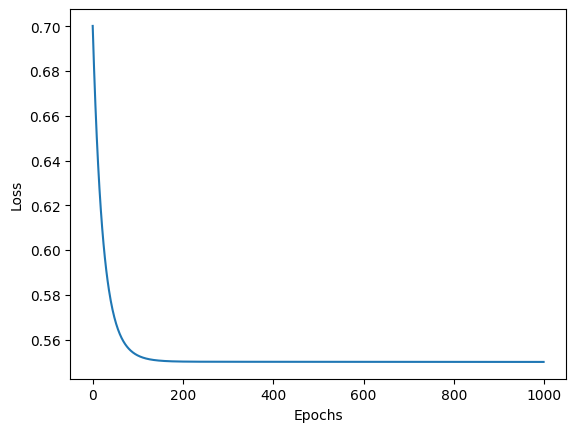

Training Losses are 
          0
0  0.762493
1  0.746619
2  0.731961
3  0.718431
4  0.705944
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


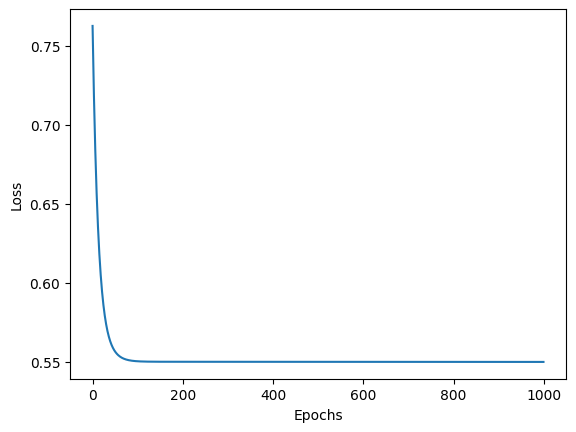

Training Losses are 
          0
0  0.566193
1  0.565981
2  0.565772
3  0.565566
4  0.565363
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


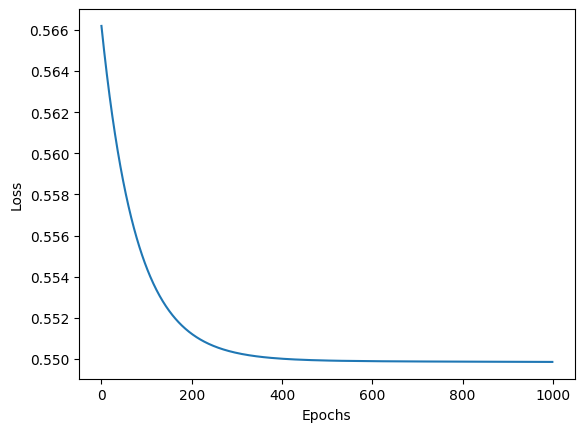

Training Losses are 
          0
0  0.707081
1  0.702935
2  0.698902
3  0.694980
4  0.691167
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


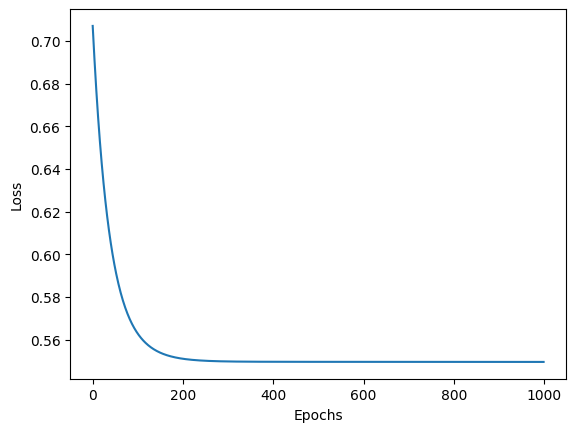

Training Losses are 
          0
0  0.816956
1  0.805053
2  0.793682
3  0.782823
4  0.772455
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


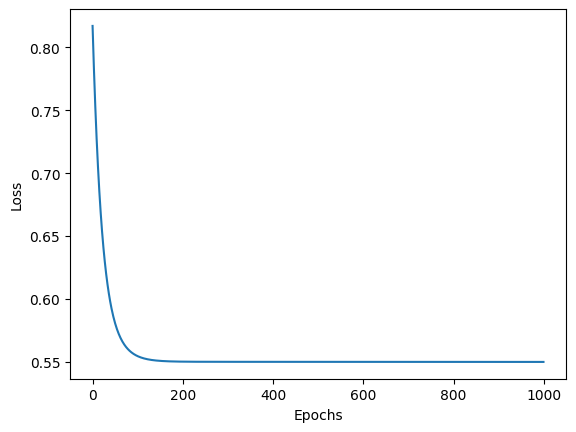

Training Losses are 
          0
0  0.722534
1  0.708351
2  0.695380
3  0.683520
4  0.672675
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


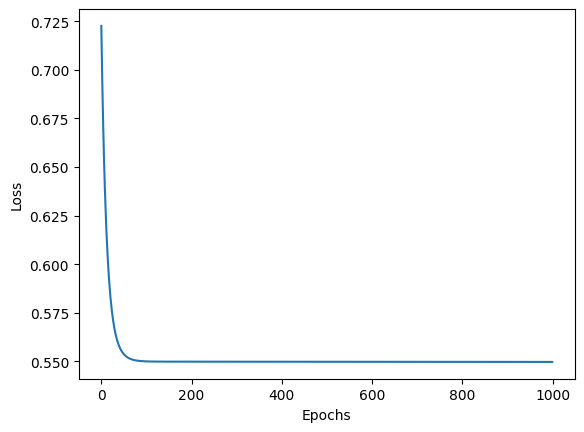

Training Losses are 
          0
0  0.685545
1  0.683732
2  0.681943
3  0.680178
4  0.678438
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


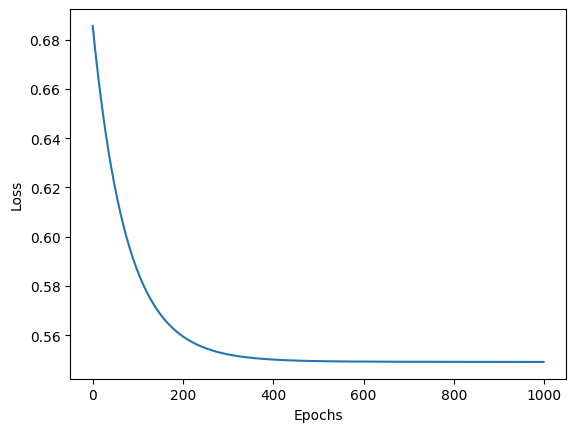

Training Losses are 
          0
0  0.810319
1  0.803943
2  0.797727
3  0.791668
4  0.785762
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


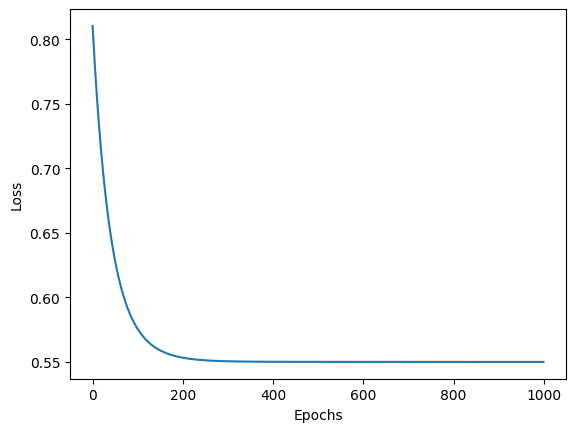

Training Losses are 
          0
0  0.574932
1  0.573934
2  0.572978
3  0.572061
4  0.571181
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


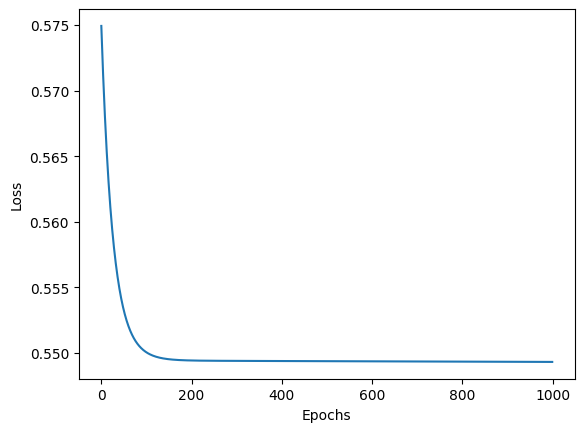

Training Losses are 
          0
0  0.691598
1  0.679723
2  0.668893
3  0.659017
4  0.650008
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


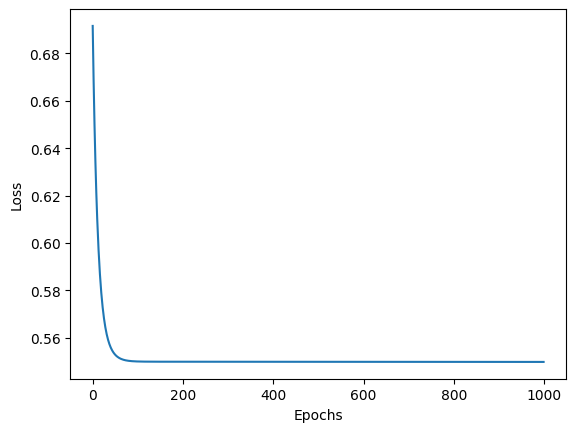

Training Losses are 
          0
0  0.583558
1  0.583090
2  0.582628
3  0.582172
4  0.581724
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


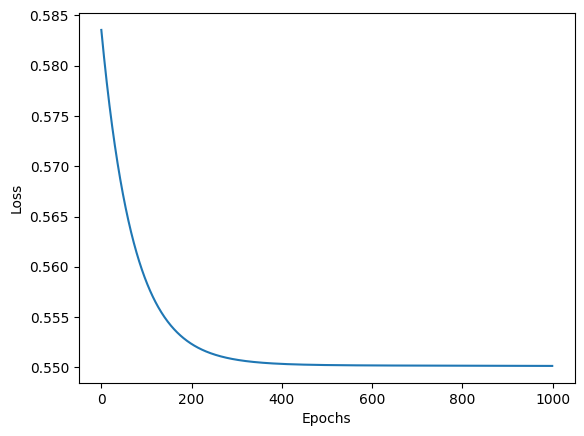

Training Losses are 
          0
0  0.759261
1  0.754097
2  0.749062
3  0.744155
4  0.739372
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


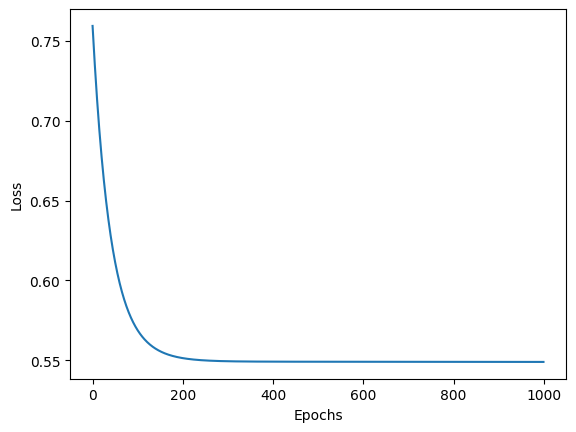

Training Losses are 
          0
0  0.615961
1  0.613051
2  0.610276
3  0.607630
4  0.605107
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


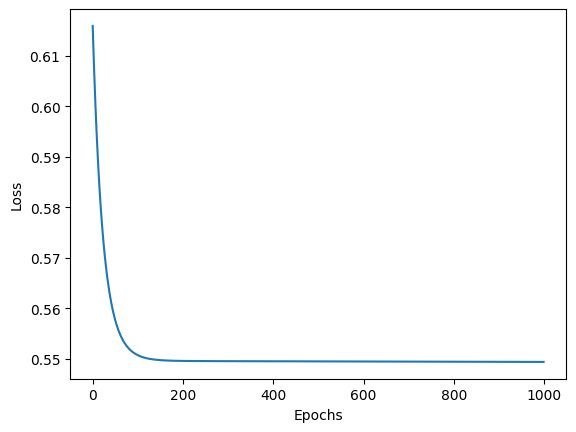

Training Losses are 
          0
0  0.628973
1  0.622259
2  0.616151
3  0.610592
4  0.605530
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


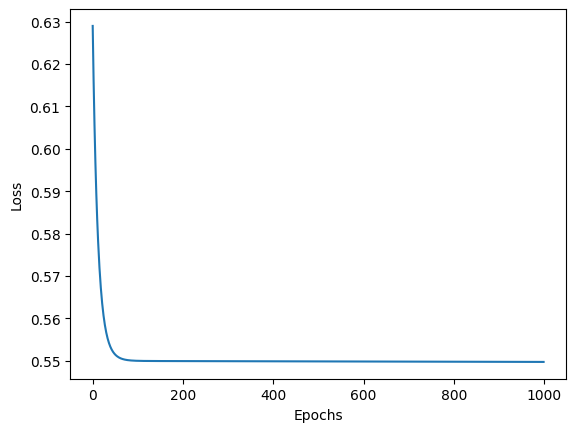

Best accuracy for test data is 0.761 for degree 8 & 8


In [18]:
nuerons = [8,16,32,64]
best_accuracy_1=0
best_degree_3=0
layer_xyz=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(11,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_1:
        best_accuracy_1=acc
        best_degree_3=nueron
        layer_xyz=double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_1} for degree {best_degree_3} & {layer_xyz}")

Training Losses are 
          0
0  0.584423
1  0.583639
2  0.582864
3  0.582097
4  0.581338
Validation Data
Confusion Matrix for hidden layer 8 and 8
[[2972   72]
 [ 632  324]]
Accuracy: 0.8240, Precision: 0.8182, Recall: 0.3389, F1-score: 0.4793

Test Data
Confusion Matrix for hiden layer 8 and 8
[[2980   64]
 [ 635  321]]
Accuracy: 0.8253, Precision: 0.8338, Recall: 0.3358, F1-score: 0.4787



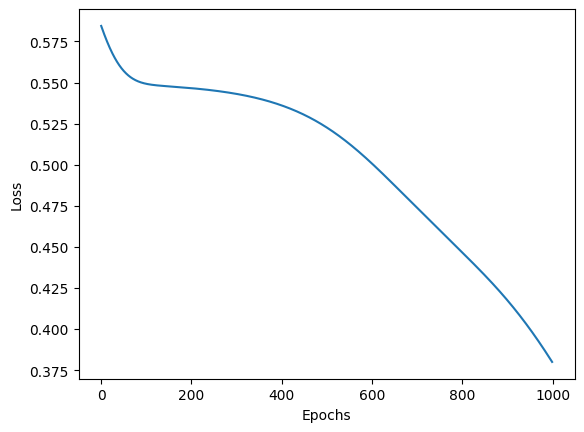

Training Losses are 
          0
0  0.704261
1  0.701234
2  0.698239
3  0.695277
4  0.692349
Validation Data
Confusion Matrix for hidden layer 8 and 16
[[3015   29]
 [ 869   87]]
Accuracy: 0.7755, Precision: 0.7500, Recall: 0.0910, F1-score: 0.1623

Test Data
Confusion Matrix for hiden layer 8 and 16
[[3017   27]
 [ 866   90]]
Accuracy: 0.7768, Precision: 0.7692, Recall: 0.0941, F1-score: 0.1678



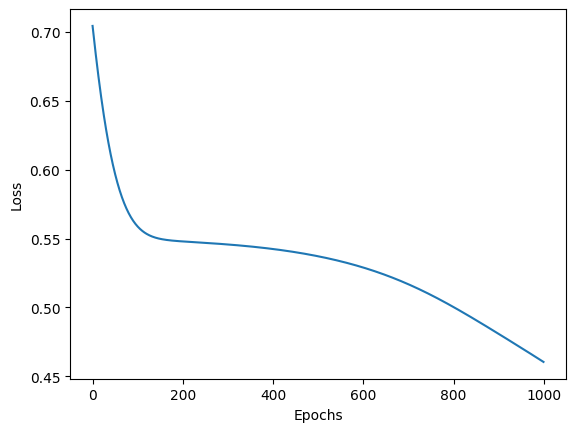

Training Losses are 
          0
0  0.762796
1  0.756349
2  0.750007
3  0.743773
4  0.737649
Validation Data
Confusion Matrix for hidden layer 8 and 32
[[2943  101]
 [ 668  288]]
Accuracy: 0.8077, Precision: 0.7404, Recall: 0.3013, F1-score: 0.4283

Test Data
Confusion Matrix for hiden layer 8 and 32
[[2962   82]
 [ 675  281]]
Accuracy: 0.8107, Precision: 0.7741, Recall: 0.2939, F1-score: 0.4261



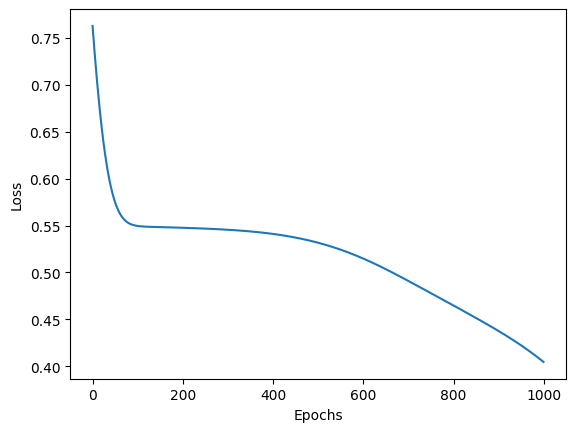

Training Losses are 
          0
0  0.695786
1  0.686147
2  0.676865
3  0.667945
4  0.659391
Validation Data
Confusion Matrix for hidden layer 8 and 64
[[2993   51]
 [ 221  735]]
Accuracy: 0.9320, Precision: 0.9351, Recall: 0.7688, F1-score: 0.8439

Test Data
Confusion Matrix for hiden layer 8 and 64
[[3004   40]
 [ 215  741]]
Accuracy: 0.9363, Precision: 0.9488, Recall: 0.7751, F1-score: 0.8532



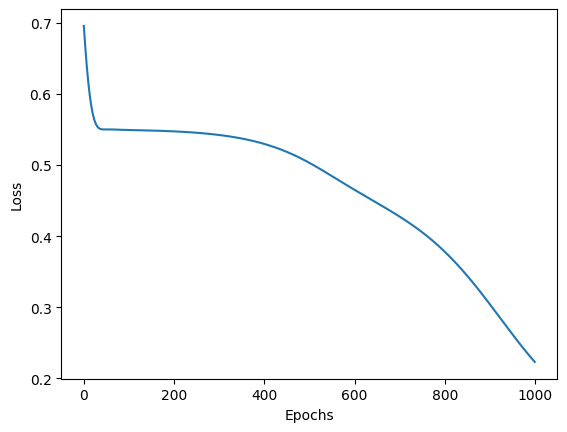

Training Losses are 
          0
0  0.864630
1  0.861426
2  0.858249
3  0.855098
4  0.851976
Validation Data
Confusion Matrix for hidden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


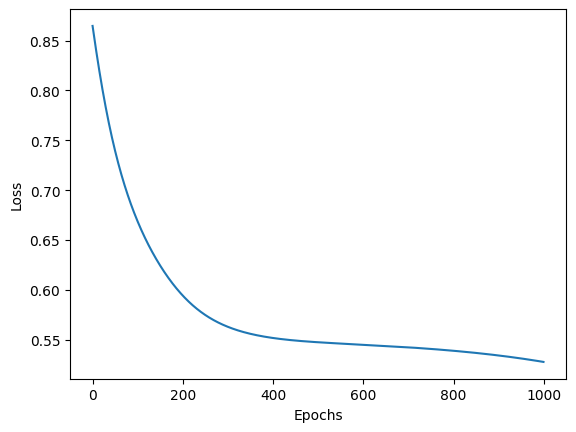

Training Losses are 
          0
0  0.679661
1  0.676533
2  0.673446
3  0.670402
4  0.667401
Validation Data
Confusion Matrix for hidden layer 16 and 16
[[2955   89]
 [ 740  216]]
Accuracy: 0.7927, Precision: 0.7082, Recall: 0.2259, F1-score: 0.3426

Test Data
Confusion Matrix for hiden layer 16 and 16
[[2970   74]
 [ 734  222]]
Accuracy: 0.7980, Precision: 0.7500, Recall: 0.2322, F1-score: 0.3546



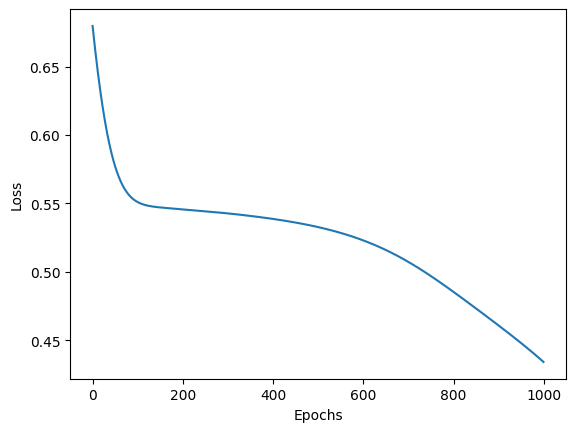

Training Losses are 
          0
0  0.672528
1  0.667030
2  0.661668
3  0.656445
4  0.651361
Validation Data
Confusion Matrix for hidden layer 16 and 32
[[2990   54]
 [ 432  524]]
Accuracy: 0.8785, Precision: 0.9066, Recall: 0.5481, F1-score: 0.6832

Test Data
Confusion Matrix for hiden layer 16 and 32
[[3003   41]
 [ 426  530]]
Accuracy: 0.8832, Precision: 0.9282, Recall: 0.5544, F1-score: 0.6942



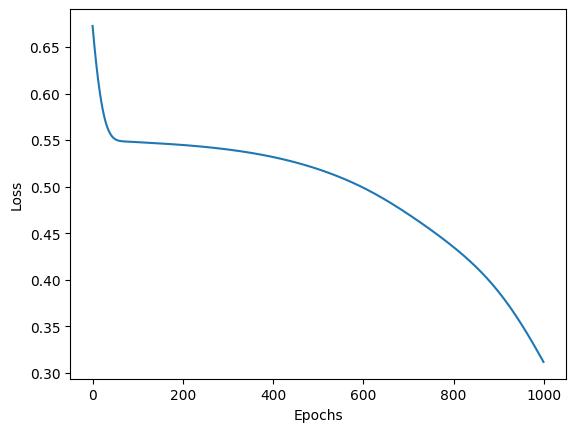

Training Losses are 
          0
0  0.699769
1  0.688830
2  0.678336
3  0.668293
4  0.658706
Validation Data
Confusion Matrix for hidden layer 16 and 64
[[2987   57]
 [  92  864]]
Accuracy: 0.9627, Precision: 0.9381, Recall: 0.9038, F1-score: 0.9206

Test Data
Confusion Matrix for hiden layer 16 and 64
[[3004   40]
 [  93  863]]
Accuracy: 0.9667, Precision: 0.9557, Recall: 0.9027, F1-score: 0.9285



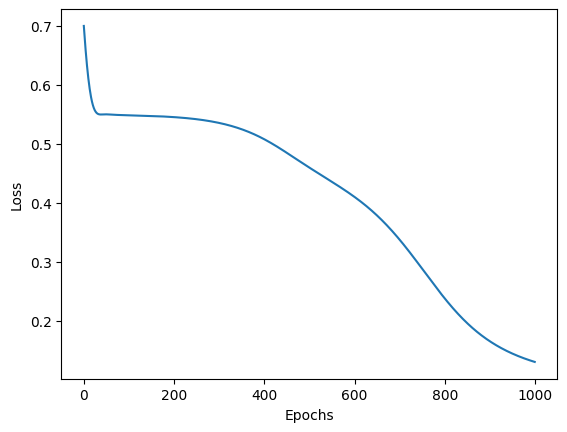

Training Losses are 
          0
0  0.640191
1  0.638298
2  0.636429
3  0.634587
4  0.632771
Validation Data
Confusion Matrix for hidden layer 32 and 8
[[2965   79]
 [ 593  363]]
Accuracy: 0.8320, Precision: 0.8213, Recall: 0.3797, F1-score: 0.5193

Test Data
Confusion Matrix for hiden layer 32 and 8
[[2978   66]
 [ 597  359]]
Accuracy: 0.8343, Precision: 0.8447, Recall: 0.3755, F1-score: 0.5199



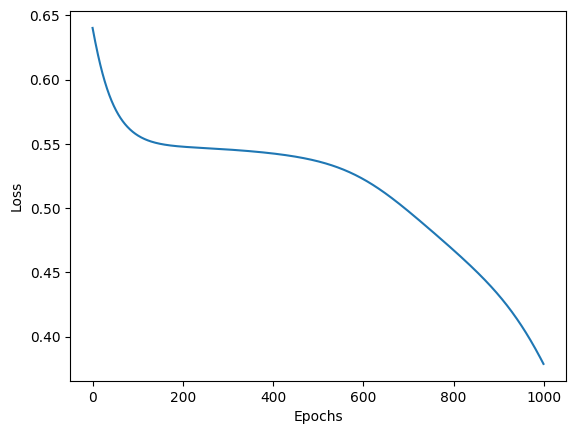

Training Losses are 
          0
0  0.763015
1  0.757488
2  0.752057
3  0.746723
4  0.741485
Validation Data
Confusion Matrix for hidden layer 32 and 16
[[2964   80]
 [ 762  194]]
Accuracy: 0.7895, Precision: 0.7080, Recall: 0.2029, F1-score: 0.3154

Test Data
Confusion Matrix for hiden layer 32 and 16
[[2974   70]
 [ 759  197]]
Accuracy: 0.7927, Precision: 0.7378, Recall: 0.2061, F1-score: 0.3222



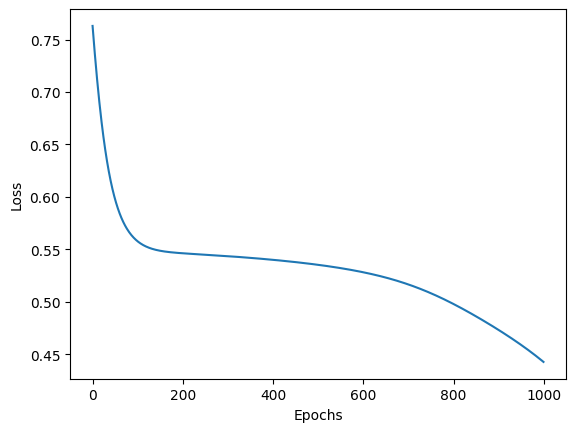

Training Losses are 
          0
0  0.619159
1  0.614015
2  0.609081
3  0.604360
4  0.599854
Validation Data
Confusion Matrix for hidden layer 32 and 32
[[2982   62]
 [  75  881]]
Accuracy: 0.9657, Precision: 0.9343, Recall: 0.9215, F1-score: 0.9279

Test Data
Confusion Matrix for hiden layer 32 and 32
[[2995   49]
 [  87  869]]
Accuracy: 0.9660, Precision: 0.9466, Recall: 0.9090, F1-score: 0.9274



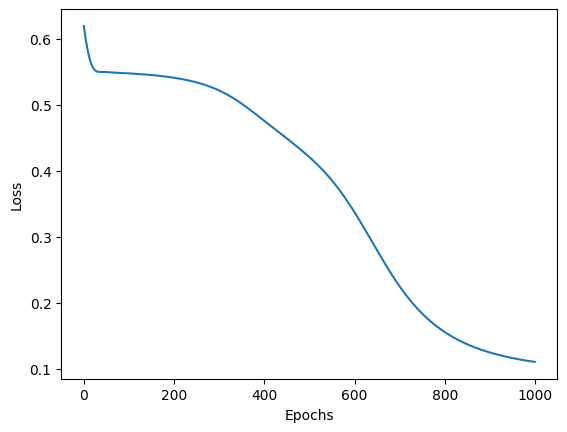

Training Losses are 
          0
0  0.638209
1  0.628685
2  0.619753
3  0.611419
4  0.603683
Validation Data
Confusion Matrix for hidden layer 32 and 64
[[2981   63]
 [  70  886]]
Accuracy: 0.9667, Precision: 0.9336, Recall: 0.9268, F1-score: 0.9302

Test Data
Confusion Matrix for hiden layer 32 and 64
[[2991   53]
 [  82  874]]
Accuracy: 0.9663, Precision: 0.9428, Recall: 0.9142, F1-score: 0.9283



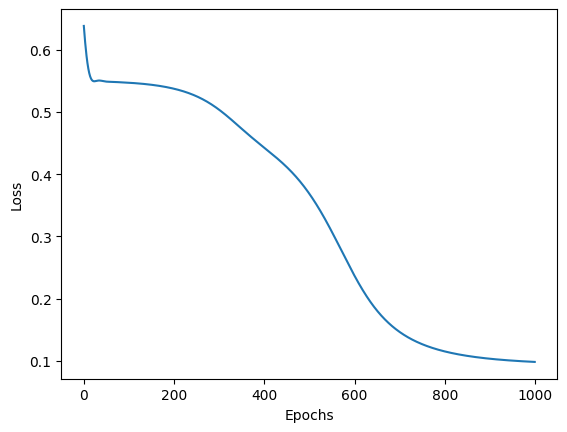

Training Losses are 
          0
0  0.719394
1  0.715010
2  0.710689
3  0.706433
4  0.702244
Validation Data
Confusion Matrix for hidden layer 64 and 8
[[2980   64]
 [ 582  374]]
Accuracy: 0.8385, Precision: 0.8539, Recall: 0.3912, F1-score: 0.5366

Test Data
Confusion Matrix for hiden layer 64 and 8
[[2996   48]
 [ 594  362]]
Accuracy: 0.8395, Precision: 0.8829, Recall: 0.3787, F1-score: 0.5300



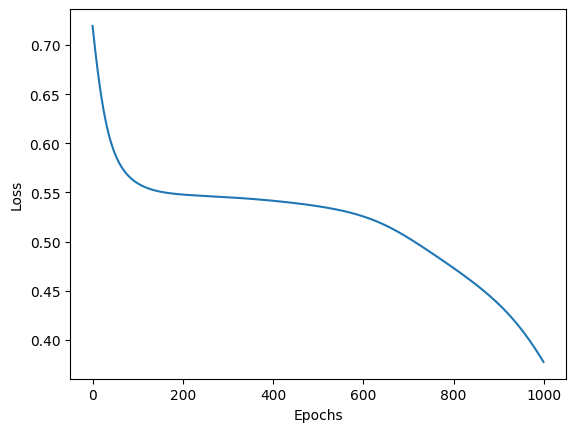

Training Losses are 
          0
0  0.759847
1  0.751634
2  0.743589
3  0.735719
4  0.728028
Validation Data
Confusion Matrix for hidden layer 64 and 16
[[3010   34]
 [ 299  657]]
Accuracy: 0.9167, Precision: 0.9508, Recall: 0.6872, F1-score: 0.7978

Test Data
Confusion Matrix for hiden layer 64 and 16
[[3013   31]
 [ 306  650]]
Accuracy: 0.9157, Precision: 0.9545, Recall: 0.6799, F1-score: 0.7941



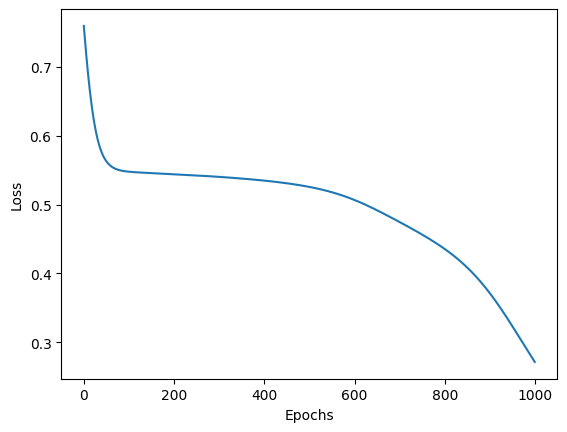

Training Losses are 
          0
0  0.804662
1  0.790289
2  0.776387
3  0.762968
4  0.750039
Validation Data
Confusion Matrix for hidden layer 64 and 32
[[2990   54]
 [  98  858]]
Accuracy: 0.9620, Precision: 0.9408, Recall: 0.8975, F1-score: 0.9186

Test Data
Confusion Matrix for hiden layer 64 and 32
[[3005   39]
 [  96  860]]
Accuracy: 0.9663, Precision: 0.9566, Recall: 0.8996, F1-score: 0.9272



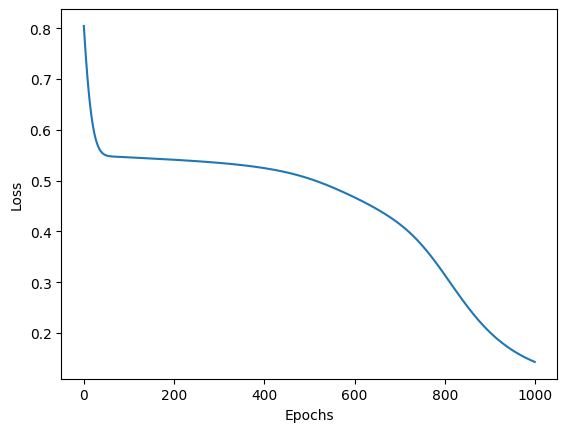

Training Losses are 
          0
0  0.623092
1  0.611661
2  0.601274
3  0.591935
4  0.583638
Validation Data
Confusion Matrix for hidden layer 64 and 64
[[2974   70]
 [  66  890]]
Accuracy: 0.9660, Precision: 0.9271, Recall: 0.9310, F1-score: 0.9290

Test Data
Confusion Matrix for hiden layer 64 and 64
[[2991   53]
 [  80  876]]
Accuracy: 0.9667, Precision: 0.9429, Recall: 0.9163, F1-score: 0.9294



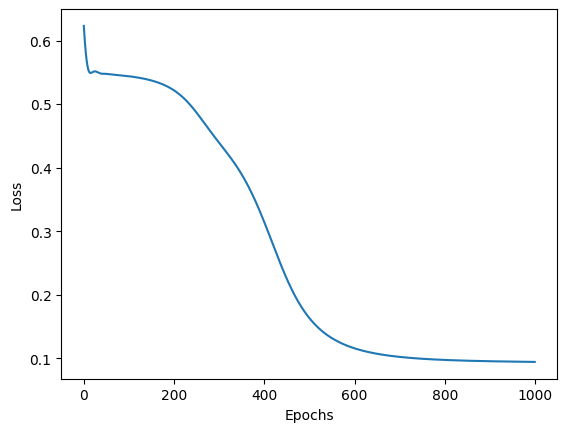

Best accuracy for test data is 0.96675 for degree 16 & 64


In [19]:
nuerons = [8,16,32,64]
best_degree_3=0
best_accuracy_2=0
layer_abc=0
for nueron in nuerons:
  for double_nueron in nuerons:
    model = DoubleLayer(11,nueron,double_nueron)
    criterion = nn.BCELoss() #Binary Classifiaction Loss
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    epochs=1000
    loss_arr=[]
    for i in range(epochs):
          optimizer.zero_grad()
          model.train()
          outputs=model(X_train)
          outputs = outputs.view(-1, 1)
          loss = criterion(outputs, y_train.float())
          loss_arr.append(loss.detach().numpy())
          loss.backward()
          optimizer.step()
    print("Training Losses are ")
    loss_df = pd.DataFrame(loss_arr)
    print(loss_df.head())
    y_val_pred=model(X_val)
    y_val_pred=(y_val_pred>0.5).float()
    cm = confusion_matrix(y_val, y_val_pred)
    acc = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val.numpy(), y_val_pred.numpy())
    recall = recall_score(y_val.numpy(), y_val_pred.numpy())
    f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
    print("Validation Data")
    print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    y_test_pred=model(X_test)
    y_test_pred=(y_test_pred>0.5).float()
    cm = confusion_matrix(y_test, y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    if acc > best_accuracy_2:
          best_accuracy_2=acc
          best_degree_4=nueron
          layer_abc = double_nueron
    precision = precision_score(y_test.numpy(), y_test_pred.numpy())
    recall = recall_score(y_test.numpy(), y_test_pred.numpy())
    f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
    print("Test Data")
    print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron}")
    print(cm)
    print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
    plt.plot(range(epochs), loss_arr)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
print(f"Best accuracy for test data is {best_accuracy_2} for degree {best_degree_4} & {layer_abc}")

In [20]:
class TripleLayer(nn.Module):
    def __init__(self, input_size, hidden1, hidden2,hidden3):
        super().__init__()
        self.layers = nn.Sequential(
        nn.Linear(input_size, hidden1),
        nn.Sigmoid(),
        nn.Linear(hidden1, hidden2),
        nn.Sigmoid(),
        nn.Linear(hidden2, hidden3),
        nn.Sigmoid(),
        nn.Linear(hidden3, 1),
        nn.Sigmoid()
        )
    def forward(self, x):
        return self.layers(x)

Training Losses are 
          0
0  0.736751
1  0.734753
2  0.732767
3  0.730793
4  0.728831
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


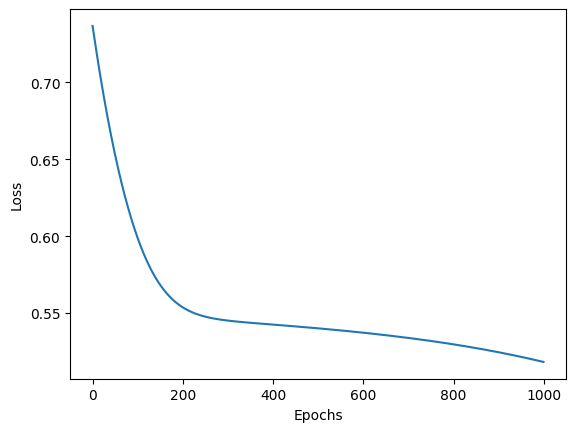

Training Losses are 
          0
0  0.650225
1  0.648693
2  0.647174
3  0.645666
4  0.644171
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


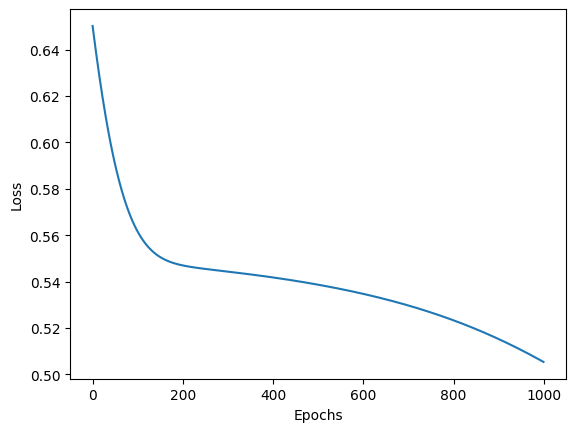

Training Losses are 
          0
0  0.649116
1  0.647723
2  0.646339
3  0.644965
4  0.643601
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


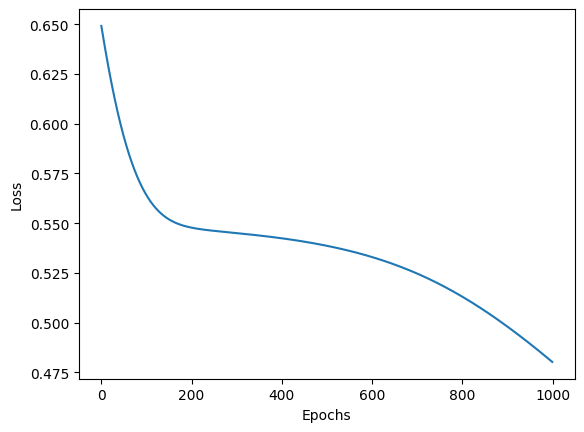

Training Losses are 
          0
0  0.575889
1  0.575265
2  0.574648
3  0.574038
4  0.573434
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[2979   65]
 [ 569  387]]
Accuracy: 0.8415, Precision: 0.8562, Recall: 0.4048, F1-score: 0.5497

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[2996   48]
 [ 578  378]]
Accuracy: 0.8435, Precision: 0.8873, Recall: 0.3954, F1-score: 0.5470



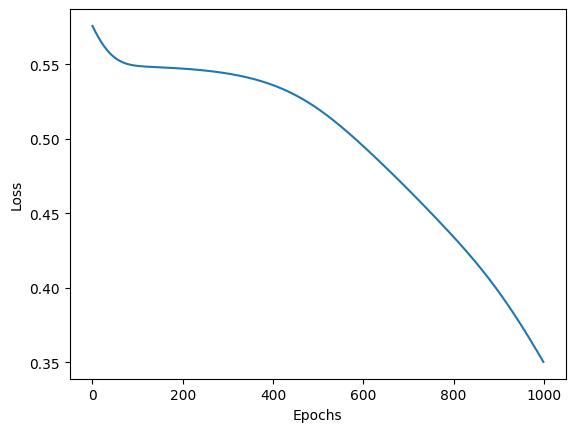

Training Losses are 
          0
0  0.686519
1  0.683556
2  0.680624
3  0.677724
4  0.674857
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[2988   56]
 [ 762  194]]
Accuracy: 0.7955, Precision: 0.7760, Recall: 0.2029, F1-score: 0.3217

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[2993   51]
 [ 764  192]]
Accuracy: 0.7963, Precision: 0.7901, Recall: 0.2008, F1-score: 0.3203



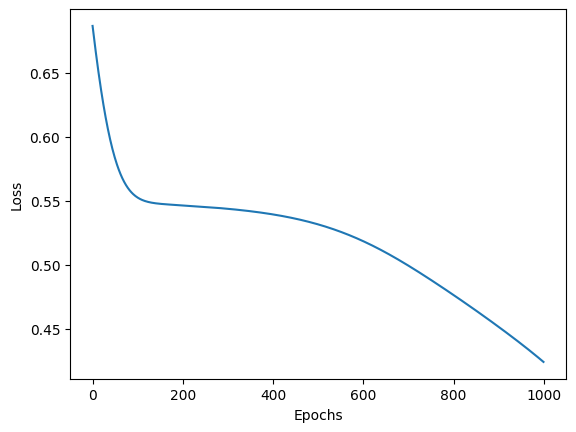

Training Losses are 
          0
0  0.785478
1  0.781534
2  0.777629
3  0.773766
4  0.769943
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


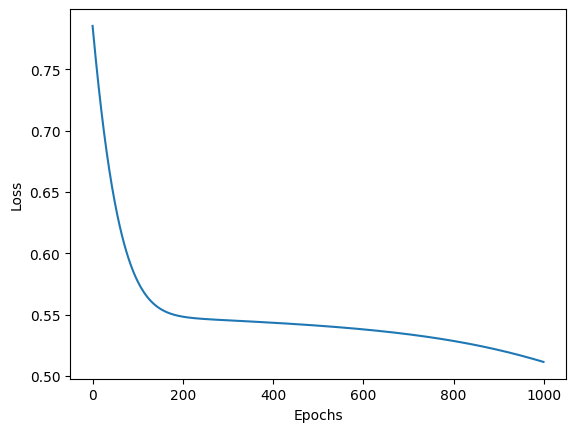

Training Losses are 
          0
0  0.689826
1  0.686899
2  0.684004
3  0.681142
4  0.678313
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3038    6]
 [ 919   37]]
Accuracy: 0.7688, Precision: 0.8605, Recall: 0.0387, F1-score: 0.0741

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3036    8]
 [ 922   34]]
Accuracy: 0.7675, Precision: 0.8095, Recall: 0.0356, F1-score: 0.0681



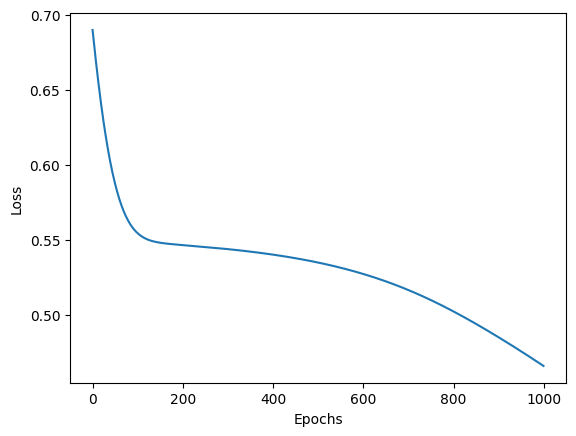

Training Losses are 
          0
0  0.806559
1  0.802632
2  0.798737
3  0.794876
4  0.791047
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


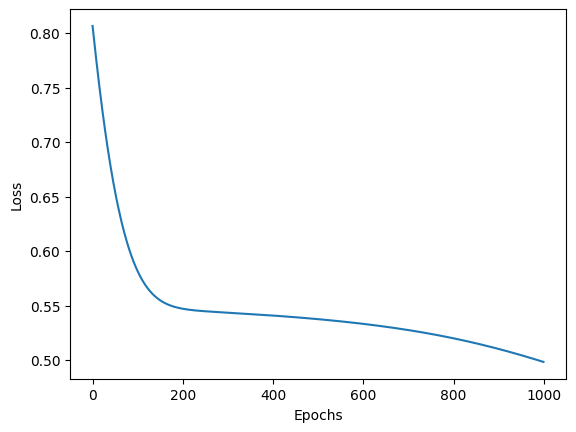

Training Losses are 
          0
0  0.754801
1  0.748328
2  0.741966
3  0.735715
4  0.729579
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[2942  102]
 [ 719  237]]
Accuracy: 0.7947, Precision: 0.6991, Recall: 0.2479, F1-score: 0.3660

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[2955   89]
 [ 707  249]]
Accuracy: 0.8010, Precision: 0.7367, Recall: 0.2605, F1-score: 0.3849



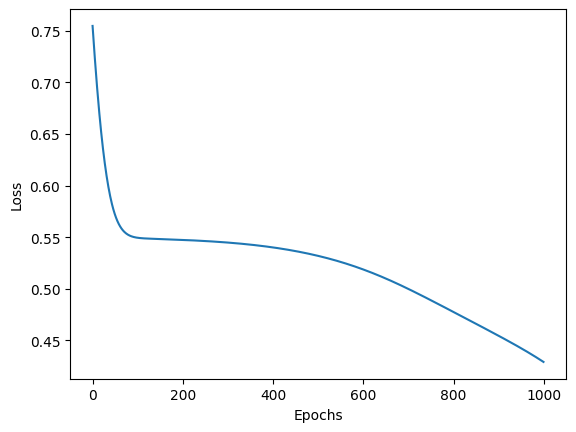

Training Losses are 
          0
0  0.778305
1  0.771568
2  0.764937
3  0.758416
4  0.752005
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[2960   84]
 [ 760  196]]
Accuracy: 0.7890, Precision: 0.7000, Recall: 0.2050, F1-score: 0.3172

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[2973   71]
 [ 756  200]]
Accuracy: 0.7933, Precision: 0.7380, Recall: 0.2092, F1-score: 0.3260



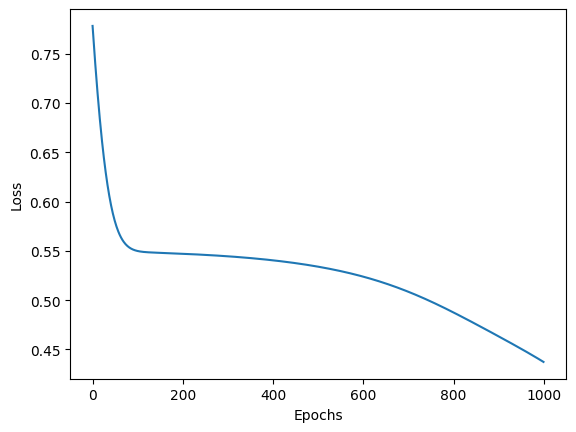

Training Losses are 
          0
0  0.631650
1  0.627572
2  0.623606
3  0.619754
4  0.616016
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[2957   87]
 [ 476  480]]
Accuracy: 0.8592, Precision: 0.8466, Recall: 0.5021, F1-score: 0.6303

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[2981   63]
 [ 463  493]]
Accuracy: 0.8685, Precision: 0.8867, Recall: 0.5157, F1-score: 0.6521



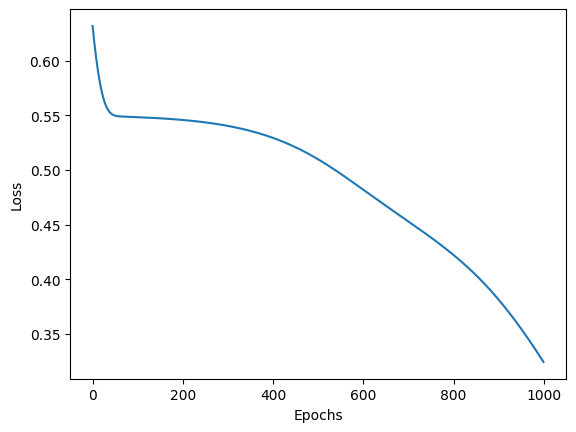

Training Losses are 
          0
0  0.697333
1  0.692150
2  0.687070
3  0.682094
4  0.677224
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[2943  101]
 [ 640  316]]
Accuracy: 0.8147, Precision: 0.7578, Recall: 0.3305, F1-score: 0.4603

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[2965   79]
 [ 654  302]]
Accuracy: 0.8167, Precision: 0.7927, Recall: 0.3159, F1-score: 0.4518



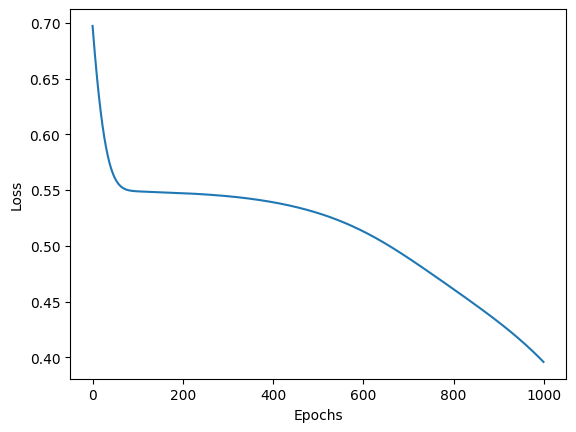

Training Losses are 
          0
0  0.608971
1  0.602796
2  0.596992
3  0.591562
4  0.586507
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[2988   56]
 [  94  862]]
Accuracy: 0.9625, Precision: 0.9390, Recall: 0.9017, F1-score: 0.9200

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3004   40]
 [ 103  853]]
Accuracy: 0.9643, Precision: 0.9552, Recall: 0.8923, F1-score: 0.9227



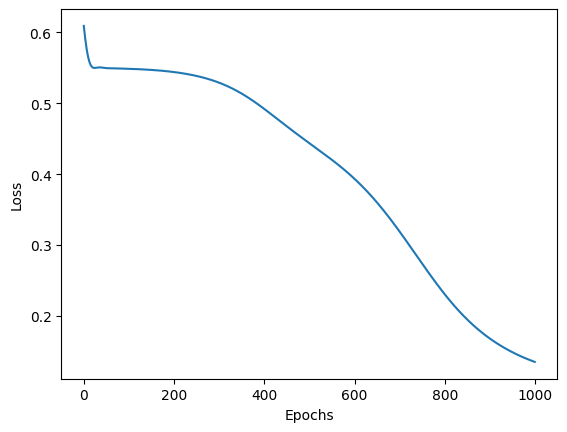

Training Losses are 
          0
0  0.729486
1  0.718180
2  0.707270
3  0.696761
4  0.686658
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[2954   90]
 [ 423  533]]
Accuracy: 0.8718, Precision: 0.8555, Recall: 0.5575, F1-score: 0.6751

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[2982   62]
 [ 417  539]]
Accuracy: 0.8802, Precision: 0.8968, Recall: 0.5638, F1-score: 0.6924



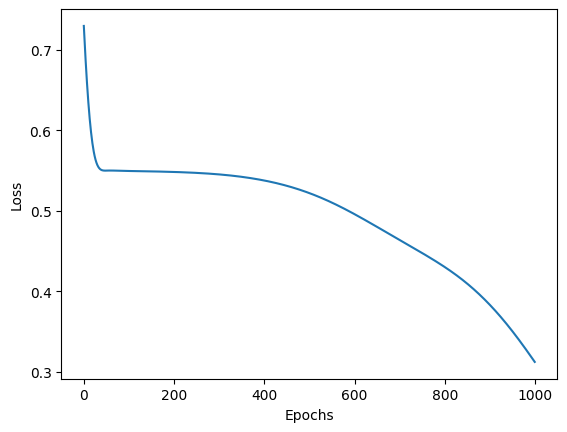

Training Losses are 
          0
0  0.733384
1  0.722197
2  0.711388
3  0.700964
4  0.690929
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[2925  119]
 [ 527  429]]
Accuracy: 0.8385, Precision: 0.7828, Recall: 0.4487, F1-score: 0.5705

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[2951   93]
 [ 520  436]]
Accuracy: 0.8468, Precision: 0.8242, Recall: 0.4561, F1-score: 0.5872



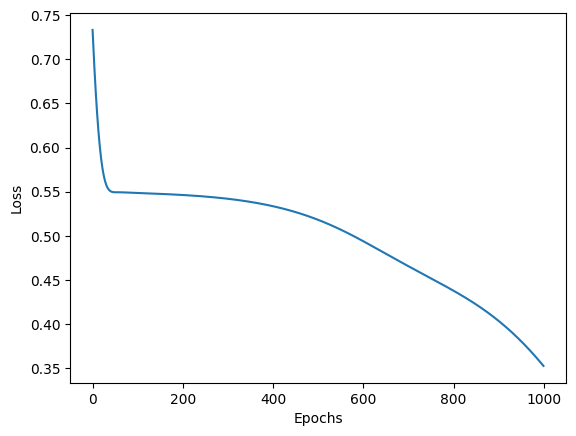

Training Losses are 
          0
0  0.684043
1  0.674568
2  0.665468
3  0.656749
4  0.648415
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[2997   47]
 [ 193  763]]
Accuracy: 0.9400, Precision: 0.9420, Recall: 0.7981, F1-score: 0.8641

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3005   39]
 [ 182  774]]
Accuracy: 0.9447, Precision: 0.9520, Recall: 0.8096, F1-score: 0.8751



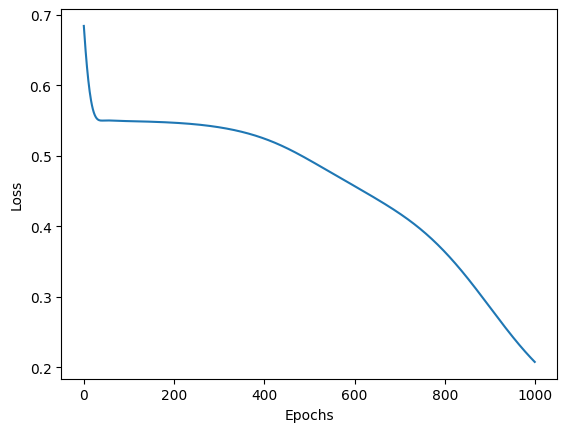

Training Losses are 
          0
0  0.659579
1  0.657800
2  0.656035
3  0.654284
4  0.652548
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3034   10]
 [ 902   54]]
Accuracy: 0.7720, Precision: 0.8438, Recall: 0.0565, F1-score: 0.1059

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3030   14]
 [ 893   63]]
Accuracy: 0.7732, Precision: 0.8182, Recall: 0.0659, F1-score: 0.1220



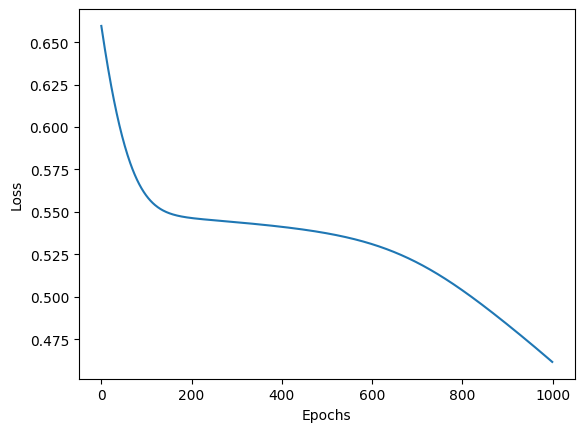

Training Losses are 
          0
0  0.589918
1  0.588759
2  0.587617
3  0.586493
4  0.585386
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[2997   47]
 [ 413  543]]
Accuracy: 0.8850, Precision: 0.9203, Recall: 0.5680, F1-score: 0.7025

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3008   36]
 [ 403  553]]
Accuracy: 0.8902, Precision: 0.9389, Recall: 0.5785, F1-score: 0.7159



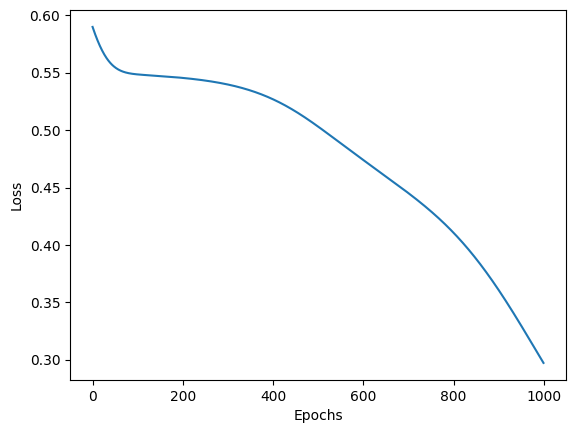

Training Losses are 
          0
0  0.663793
1  0.662144
2  0.660510
3  0.658892
4  0.657289
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3041    3]
 [ 938   18]]
Accuracy: 0.7648, Precision: 0.8571, Recall: 0.0188, F1-score: 0.0368

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3042    2]
 [ 936   20]]
Accuracy: 0.7655, Precision: 0.9091, Recall: 0.0209, F1-score: 0.0409



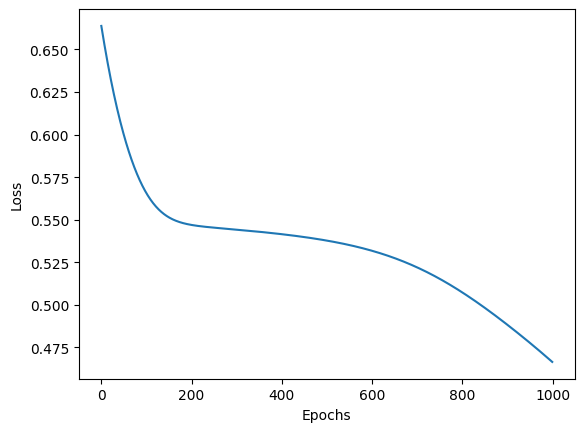

Training Losses are 
          0
0  0.775580
1  0.772617
2  0.769671
3  0.766742
4  0.763830
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3043    1]
 [ 951    5]]
Accuracy: 0.7620, Precision: 0.8333, Recall: 0.0052, F1-score: 0.0104

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3043    1]
 [ 952    4]]
Accuracy: 0.7618, Precision: 0.8000, Recall: 0.0042, F1-score: 0.0083



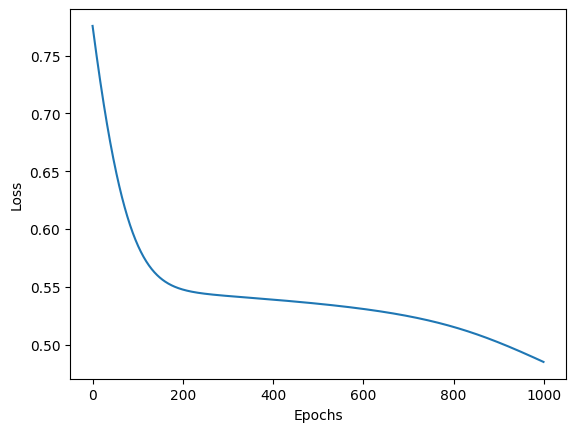

Training Losses are 
          0
0  0.692611
1  0.689035
2  0.685507
3  0.682027
4  0.678596
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[2938  106]
 [ 617  339]]
Accuracy: 0.8193, Precision: 0.7618, Recall: 0.3546, F1-score: 0.4839

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[2956   88]
 [ 616  340]]
Accuracy: 0.8240, Precision: 0.7944, Recall: 0.3556, F1-score: 0.4913



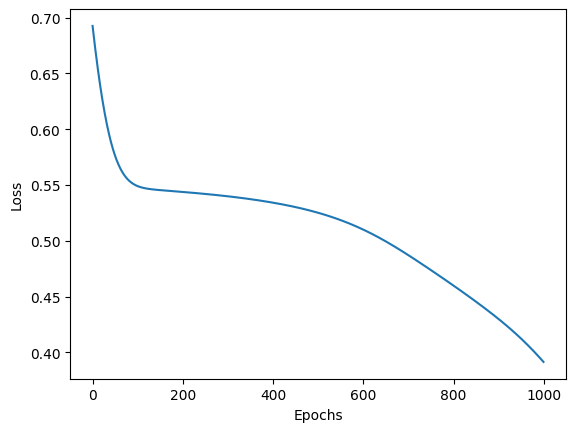

Training Losses are 
          0
0  0.676048
1  0.672872
2  0.669741
3  0.666655
4  0.663613
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[2947   97]
 [ 627  329]]
Accuracy: 0.8190, Precision: 0.7723, Recall: 0.3441, F1-score: 0.4761

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[2969   75]
 [ 626  330]]
Accuracy: 0.8247, Precision: 0.8148, Recall: 0.3452, F1-score: 0.4849



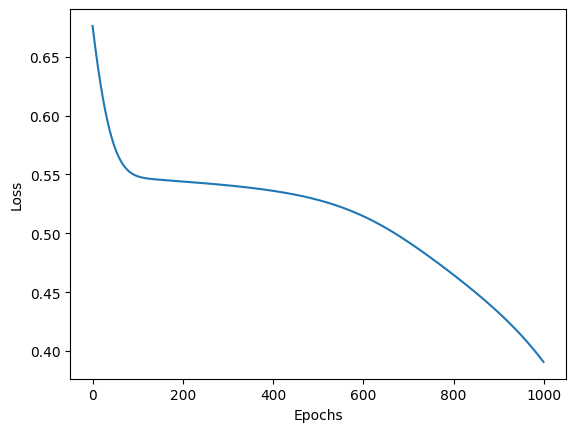

Training Losses are 
          0
0  0.808463
1  0.804069
2  0.799729
3  0.795444
4  0.791214
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3035    9]
 [ 918   38]]
Accuracy: 0.7682, Precision: 0.8085, Recall: 0.0397, F1-score: 0.0758

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3033   11]
 [ 913   43]]
Accuracy: 0.7690, Precision: 0.7963, Recall: 0.0450, F1-score: 0.0851



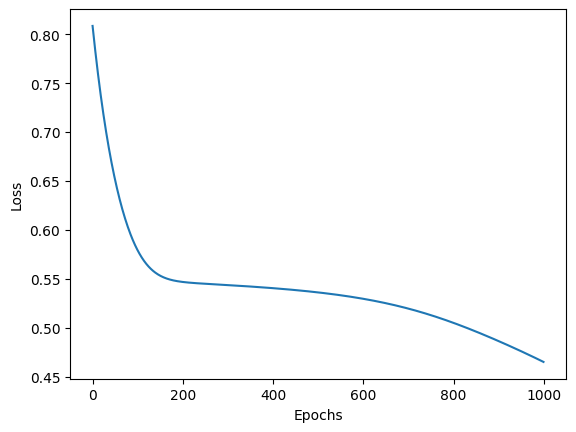

Training Losses are 
          0
0  0.680116
1  0.676876
2  0.673679
3  0.670525
4  0.667413
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[2992   52]
 [ 795  161]]
Accuracy: 0.7883, Precision: 0.7559, Recall: 0.1684, F1-score: 0.2754

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[2991   53]
 [ 791  165]]
Accuracy: 0.7890, Precision: 0.7569, Recall: 0.1726, F1-score: 0.2811



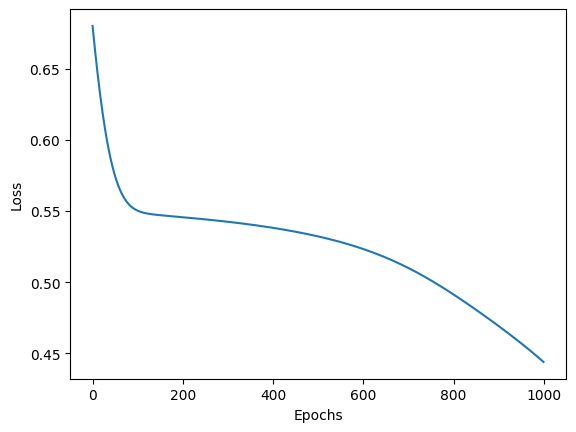

Training Losses are 
          0
0  0.696007
1  0.690116
2  0.684356
3  0.678728
4  0.673235
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[2938  106]
 [ 571  385]]
Accuracy: 0.8307, Precision: 0.7841, Recall: 0.4027, F1-score: 0.5321

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[2966   78]
 [ 575  381]]
Accuracy: 0.8367, Precision: 0.8301, Recall: 0.3985, F1-score: 0.5385



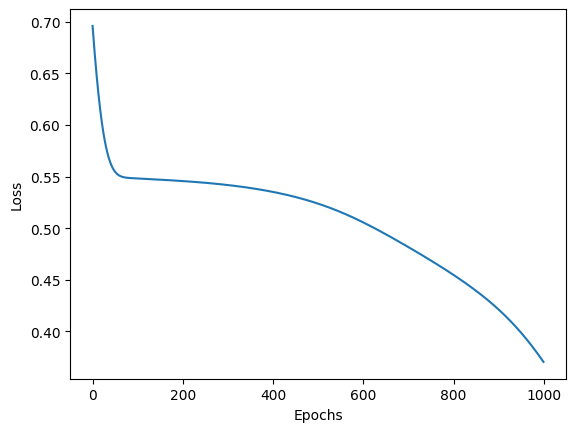

Training Losses are 
          0
0  0.652470
1  0.647329
2  0.642332
3  0.637483
4  0.632782
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[2981   63]
 [ 454  502]]
Accuracy: 0.8708, Precision: 0.8885, Recall: 0.5251, F1-score: 0.6601

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[2996   48]
 [ 450  506]]
Accuracy: 0.8755, Precision: 0.9134, Recall: 0.5293, F1-score: 0.6702



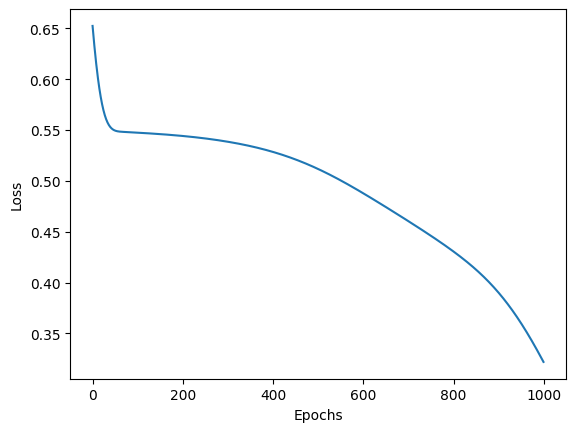

Training Losses are 
          0
0  0.815913
1  0.807637
2  0.799503
3  0.791515
4  0.783675
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[2945   99]
 [ 708  248]]
Accuracy: 0.7983, Precision: 0.7147, Recall: 0.2594, F1-score: 0.3807

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[2958   86]
 [ 711  245]]
Accuracy: 0.8007, Precision: 0.7402, Recall: 0.2563, F1-score: 0.3807



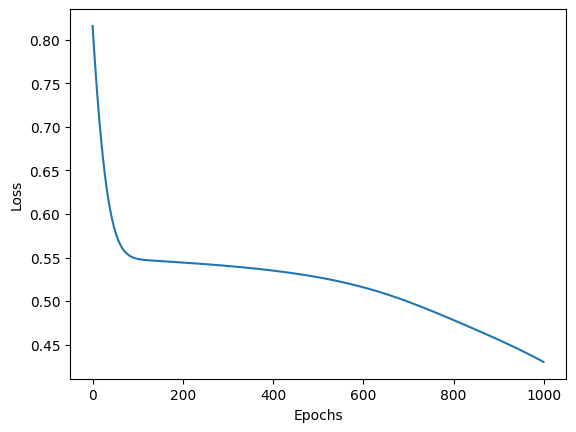

Training Losses are 
          0
0  0.879410
1  0.870362
2  0.861457
3  0.852695
4  0.844081
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3012   32]
 [ 853  103]]
Accuracy: 0.7788, Precision: 0.7630, Recall: 0.1077, F1-score: 0.1888

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3010   34]
 [ 843  113]]
Accuracy: 0.7808, Precision: 0.7687, Recall: 0.1182, F1-score: 0.2049



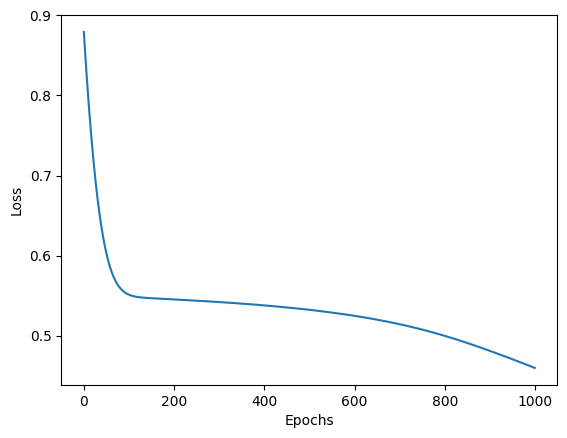

Training Losses are 
          0
0  0.588902
1  0.583621
2  0.578753
3  0.574300
4  0.570262
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[2984   60]
 [  75  881]]
Accuracy: 0.9663, Precision: 0.9362, Recall: 0.9215, F1-score: 0.9288

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[2991   53]
 [  84  872]]
Accuracy: 0.9657, Precision: 0.9427, Recall: 0.9121, F1-score: 0.9272



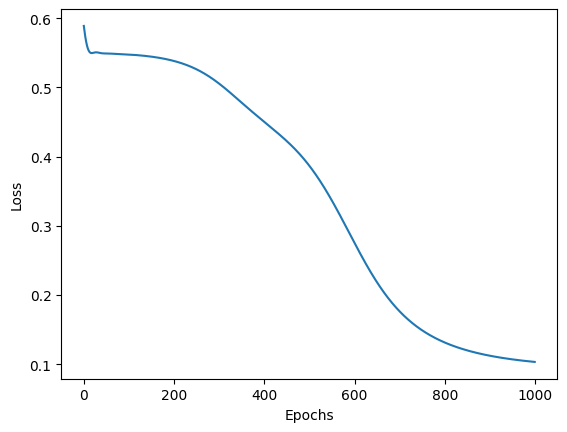

Training Losses are 
          0
0  0.848949
1  0.833374
2  0.818226
3  0.803515
4  0.789251
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[2986   58]
 [ 255  701]]
Accuracy: 0.9217, Precision: 0.9236, Recall: 0.7333, F1-score: 0.8175

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3004   40]
 [ 249  707]]
Accuracy: 0.9277, Precision: 0.9465, Recall: 0.7395, F1-score: 0.8303



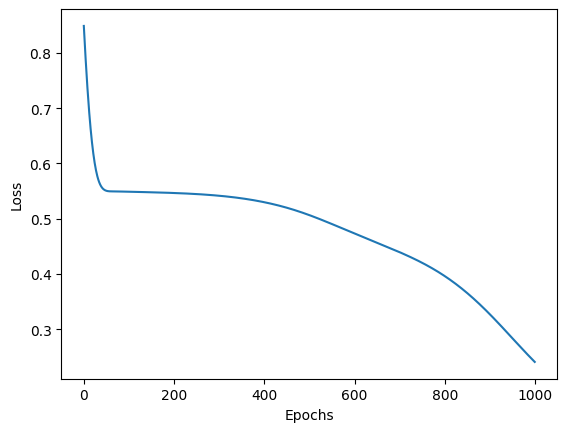

Training Losses are 
          0
0  0.822434
1  0.807209
2  0.792456
3  0.778182
4  0.764394
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[2978   66]
 [ 342  614]]
Accuracy: 0.8980, Precision: 0.9029, Recall: 0.6423, F1-score: 0.7506

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[2999   45]
 [ 337  619]]
Accuracy: 0.9045, Precision: 0.9322, Recall: 0.6475, F1-score: 0.7642



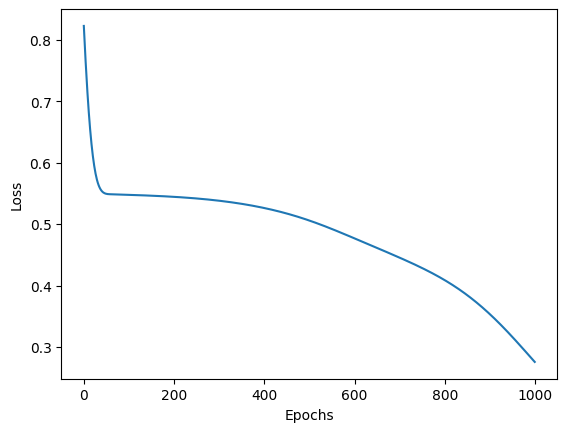

Training Losses are 
          0
0  0.696595
1  0.685914
2  0.675668
3  0.665864
4  0.656506
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[2988   56]
 [ 100  856]]
Accuracy: 0.9610, Precision: 0.9386, Recall: 0.8954, F1-score: 0.9165

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3007   37]
 [ 104  852]]
Accuracy: 0.9647, Precision: 0.9584, Recall: 0.8912, F1-score: 0.9236



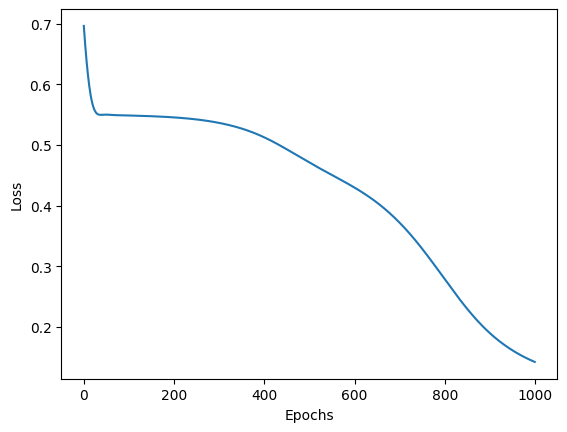

Training Losses are 
          0
0  0.602588
1  0.600843
2  0.599128
3  0.597442
4  0.595787
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3011   33]
 [ 218  738]]
Accuracy: 0.9373, Precision: 0.9572, Recall: 0.7720, F1-score: 0.8547

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3018   26]
 [ 207  749]]
Accuracy: 0.9417, Precision: 0.9665, Recall: 0.7835, F1-score: 0.8654



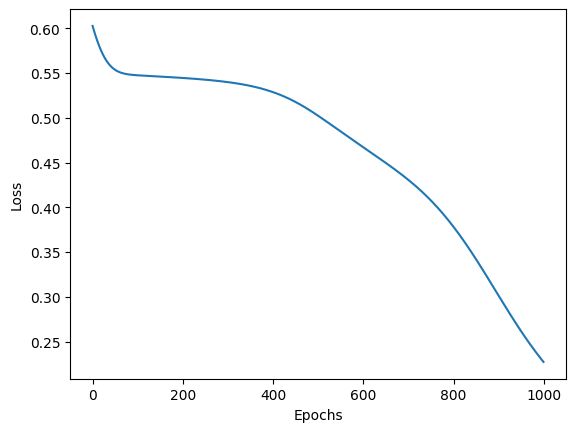

Training Losses are 
          0
0  0.775549
1  0.771451
2  0.767395
3  0.763382
4  0.759413
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3042    2]
 [ 940   16]]
Accuracy: 0.7645, Precision: 0.8889, Recall: 0.0167, F1-score: 0.0329

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3042    2]
 [ 941   15]]
Accuracy: 0.7642, Precision: 0.8824, Recall: 0.0157, F1-score: 0.0308



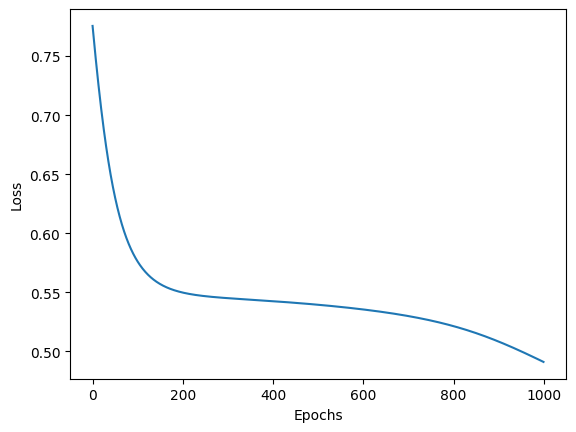

Training Losses are 
          0
0  0.562962
1  0.561933
2  0.560944
3  0.559996
4  0.559090
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[2986   58]
 [  93  863]]
Accuracy: 0.9623, Precision: 0.9370, Recall: 0.9027, F1-score: 0.9196

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3005   39]
 [  93  863]]
Accuracy: 0.9670, Precision: 0.9568, Recall: 0.9027, F1-score: 0.9290



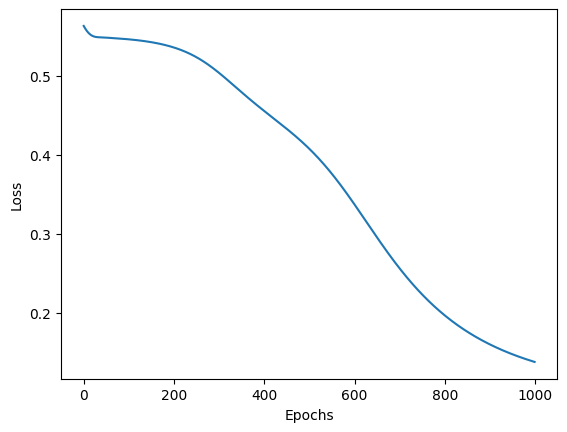

Training Losses are 
          0
0  0.732672
1  0.729221
2  0.725819
3  0.722465
4  0.719162
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 954    2]]
Accuracy: 0.7615, Precision: 1.0000, Recall: 0.0021, F1-score: 0.0042



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


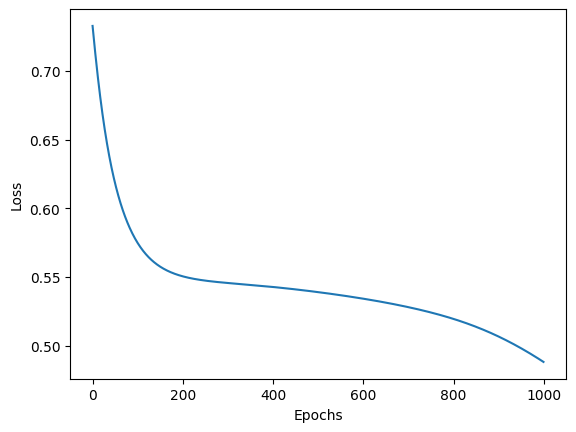

Training Losses are 
          0
0  0.595691
1  0.592804
2  0.590013
3  0.587319
4  0.584723
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[2988   56]
 [  95  861]]
Accuracy: 0.9623, Precision: 0.9389, Recall: 0.9006, F1-score: 0.9194

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3006   38]
 [  96  860]]
Accuracy: 0.9665, Precision: 0.9577, Recall: 0.8996, F1-score: 0.9277



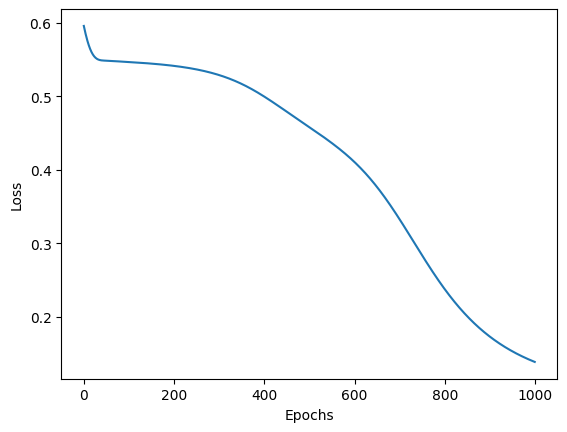

Training Losses are 
          0
0  0.616173
1  0.613001
2  0.609915
3  0.606914
4  0.604001
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[2989   55]
 [  99  857]]
Accuracy: 0.9615, Precision: 0.9397, Recall: 0.8964, F1-score: 0.9176

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3007   37]
 [ 103  853]]
Accuracy: 0.9650, Precision: 0.9584, Recall: 0.8923, F1-score: 0.9242



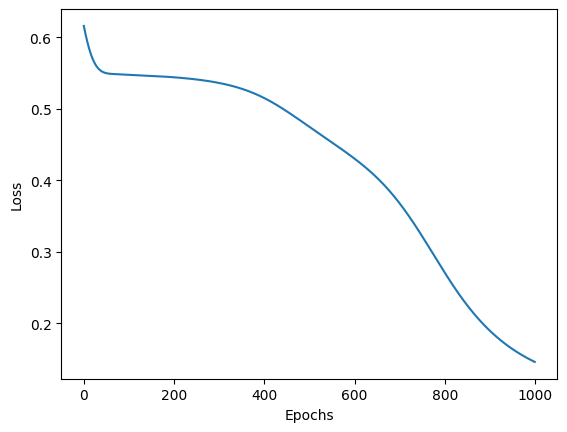

Training Losses are 
          0
0  0.769233
1  0.763916
2  0.758660
3  0.753466
4  0.748336
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[2931  113]
 [ 692  264]]
Accuracy: 0.7987, Precision: 0.7003, Recall: 0.2762, F1-score: 0.3961

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[2951   93]
 [ 693  263]]
Accuracy: 0.8035, Precision: 0.7388, Recall: 0.2751, F1-score: 0.4009



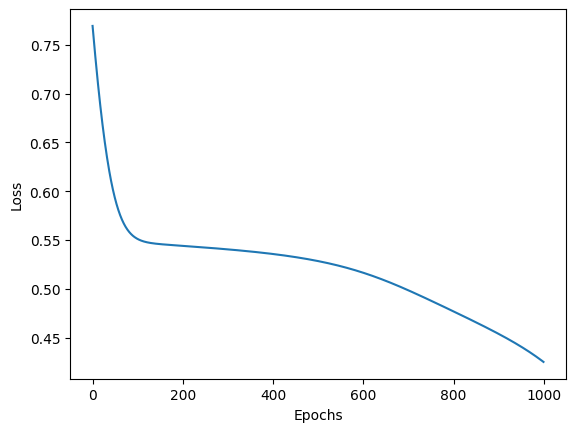

Training Losses are 
          0
0  0.965253
1  0.956628
2  0.948124
3  0.939743
4  0.931488
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 954    2]]
Accuracy: 0.7615, Precision: 1.0000, Recall: 0.0021, F1-score: 0.0042

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3043    1]
 [ 953    3]]
Accuracy: 0.7615, Precision: 0.7500, Recall: 0.0031, F1-score: 0.0063



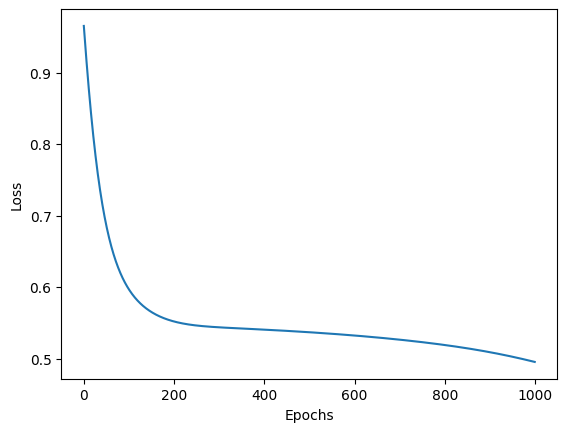

Training Losses are 
          0
0  0.771478
1  0.762722
2  0.754161
3  0.745797
4  0.737629
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3002   42]
 [ 180  776]]
Accuracy: 0.9445, Precision: 0.9487, Recall: 0.8117, F1-score: 0.8749

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3015   29]
 [ 175  781]]
Accuracy: 0.9490, Precision: 0.9642, Recall: 0.8169, F1-score: 0.8845



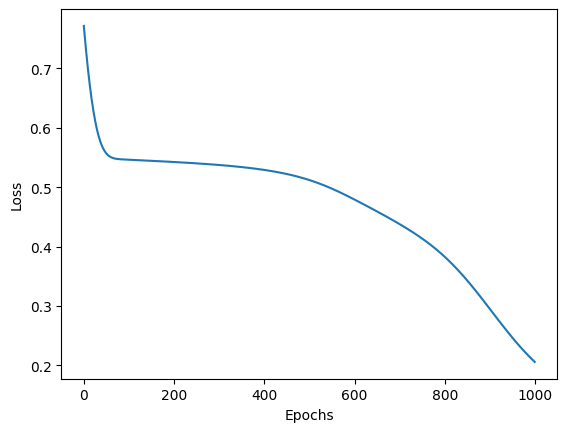

Training Losses are 
          0
0  0.709047
1  0.701543
2  0.694244
3  0.687151
4  0.680269
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[2994   50]
 [ 112  844]]
Accuracy: 0.9595, Precision: 0.9441, Recall: 0.8828, F1-score: 0.9124

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3009   35]
 [ 114  842]]
Accuracy: 0.9627, Precision: 0.9601, Recall: 0.8808, F1-score: 0.9187



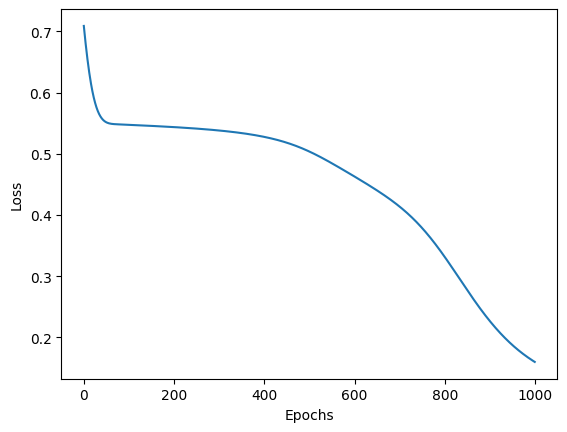

Training Losses are 
          0
0  0.620352
1  0.615276
2  0.610403
3  0.605736
4  0.601277
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[2984   60]
 [  76  880]]
Accuracy: 0.9660, Precision: 0.9362, Recall: 0.9205, F1-score: 0.9283

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[2996   48]
 [  87  869]]
Accuracy: 0.9663, Precision: 0.9477, Recall: 0.9090, F1-score: 0.9279



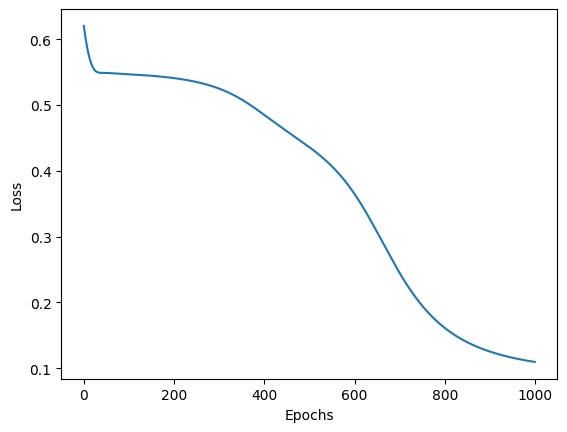

Training Losses are 
          0
0  0.726256
1  0.717716
2  0.709419
3  0.701365
4  0.693557
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3001   43]
 [ 152  804]]
Accuracy: 0.9513, Precision: 0.9492, Recall: 0.8410, F1-score: 0.8918

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3012   32]
 [ 146  810]]
Accuracy: 0.9555, Precision: 0.9620, Recall: 0.8473, F1-score: 0.9010



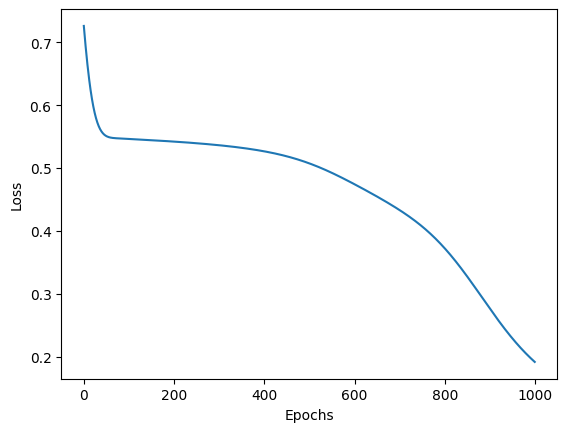

Training Losses are 
          0
0  0.790594
1  0.774463
2  0.758940
3  0.744032
4  0.729748
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[2990   54]
 [  90  866]]
Accuracy: 0.9640, Precision: 0.9413, Recall: 0.9059, F1-score: 0.9232

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3003   41]
 [  94  862]]
Accuracy: 0.9663, Precision: 0.9546, Recall: 0.9017, F1-score: 0.9274



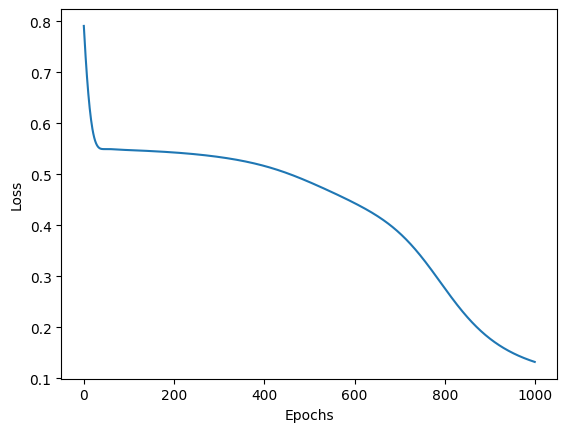

Training Losses are 
          0
0  0.658767
1  0.648032
2  0.637894
3  0.628356
4  0.619423
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[2981   63]
 [  73  883]]
Accuracy: 0.9660, Precision: 0.9334, Recall: 0.9236, F1-score: 0.9285

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[2991   53]
 [  82  874]]
Accuracy: 0.9663, Precision: 0.9428, Recall: 0.9142, F1-score: 0.9283



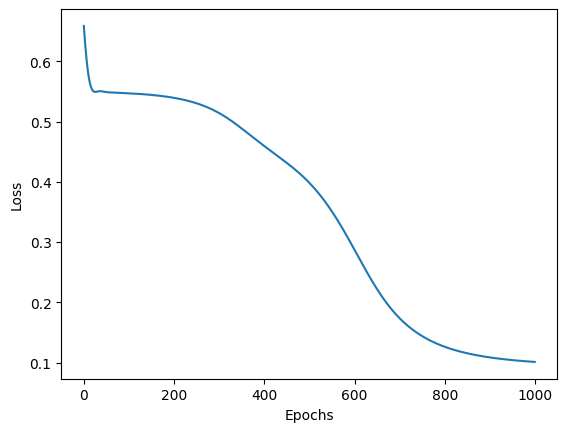

Training Losses are 
          0
0  0.657219
1  0.646593
2  0.636569
3  0.627151
4  0.618343
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[2982   62]
 [  74  882]]
Accuracy: 0.9660, Precision: 0.9343, Recall: 0.9226, F1-score: 0.9284

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[2991   53]
 [  82  874]]
Accuracy: 0.9663, Precision: 0.9428, Recall: 0.9142, F1-score: 0.9283



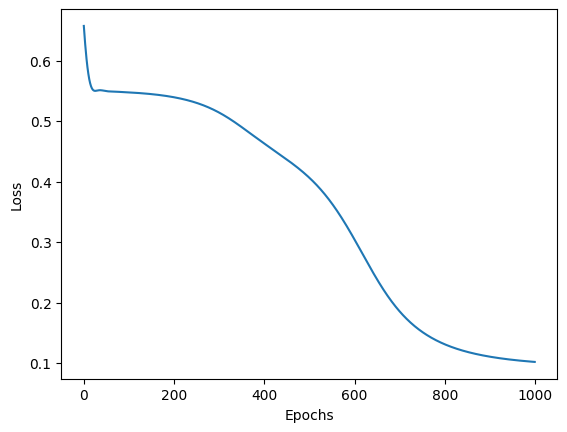

Training Losses are 
          0
0  0.835486
1  0.817901
2  0.800930
3  0.784583
4  0.768867
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[2988   56]
 [  92  864]]
Accuracy: 0.9630, Precision: 0.9391, Recall: 0.9038, F1-score: 0.9211

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3002   42]
 [  95  861]]
Accuracy: 0.9657, Precision: 0.9535, Recall: 0.9006, F1-score: 0.9263



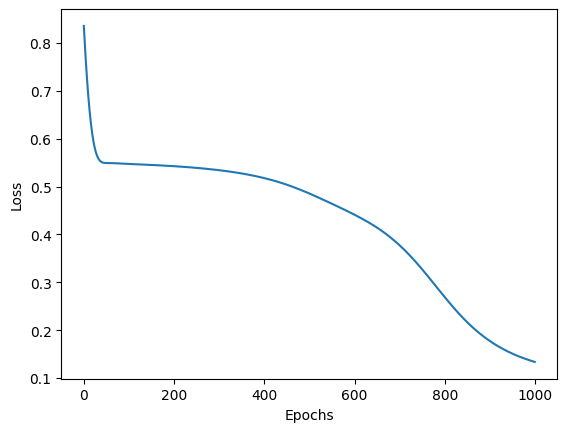

Training Losses are 
          0
0  0.597799
1  0.595014
2  0.592310
3  0.589692
4  0.587160
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[2987   57]
 [  87  869]]
Accuracy: 0.9640, Precision: 0.9384, Recall: 0.9090, F1-score: 0.9235

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3004   40]
 [  94  862]]
Accuracy: 0.9665, Precision: 0.9557, Recall: 0.9017, F1-score: 0.9279



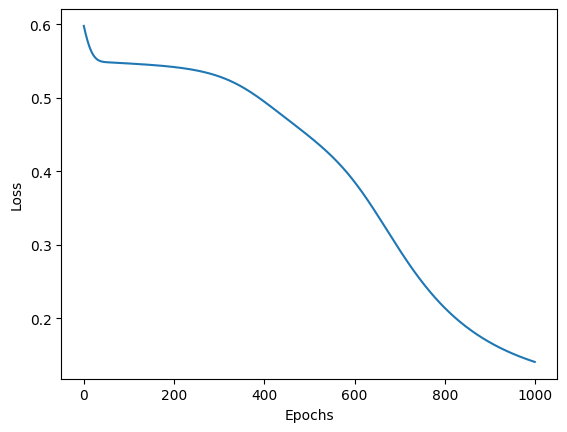

Training Losses are 
          0
0  0.578316
1  0.576373
2  0.574501
3  0.572703
4  0.570979
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[2981   63]
 [  77  879]]
Accuracy: 0.9650, Precision: 0.9331, Recall: 0.9195, F1-score: 0.9262

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[2998   46]
 [  87  869]]
Accuracy: 0.9667, Precision: 0.9497, Recall: 0.9090, F1-score: 0.9289



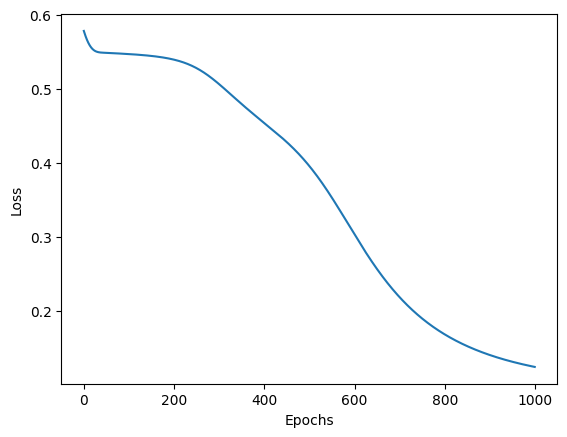

Training Losses are 
          0
0  0.663805
1  0.658728
2  0.653752
3  0.648884
4  0.644128
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3011   33]
 [ 161  795]]
Accuracy: 0.9515, Precision: 0.9601, Recall: 0.8316, F1-score: 0.8913

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3022   22]
 [ 155  801]]
Accuracy: 0.9557, Precision: 0.9733, Recall: 0.8379, F1-score: 0.9005



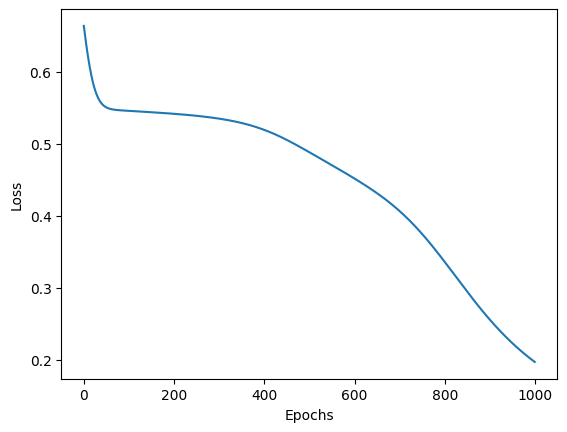

Training Losses are 
          0
0  0.596819
1  0.593944
2  0.591159
3  0.588467
4  0.585872
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[2983   61]
 [  83  873]]
Accuracy: 0.9640, Precision: 0.9347, Recall: 0.9132, F1-score: 0.9238

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[2999   45]
 [  88  868]]
Accuracy: 0.9667, Precision: 0.9507, Recall: 0.9079, F1-score: 0.9288



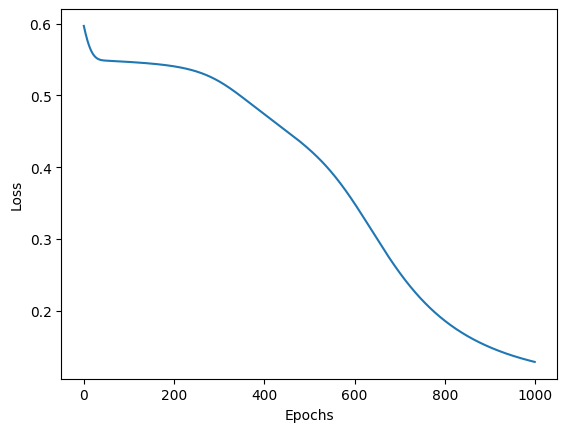

Training Losses are 
          0
0  0.642554
1  0.636773
2  0.631189
3  0.625806
4  0.620628
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[2983   61]
 [  77  879]]
Accuracy: 0.9655, Precision: 0.9351, Recall: 0.9195, F1-score: 0.9272

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[2996   48]
 [  90  866]]
Accuracy: 0.9655, Precision: 0.9475, Recall: 0.9059, F1-score: 0.9262



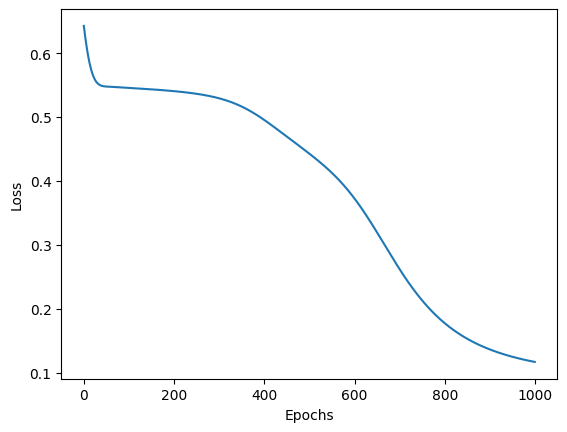

Training Losses are 
          0
0  0.595371
1  0.591671
2  0.588142
3  0.584785
4  0.581603
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[2979   65]
 [  70  886]]
Accuracy: 0.9663, Precision: 0.9317, Recall: 0.9268, F1-score: 0.9292

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[2989   55]
 [  82  874]]
Accuracy: 0.9657, Precision: 0.9408, Recall: 0.9142, F1-score: 0.9273



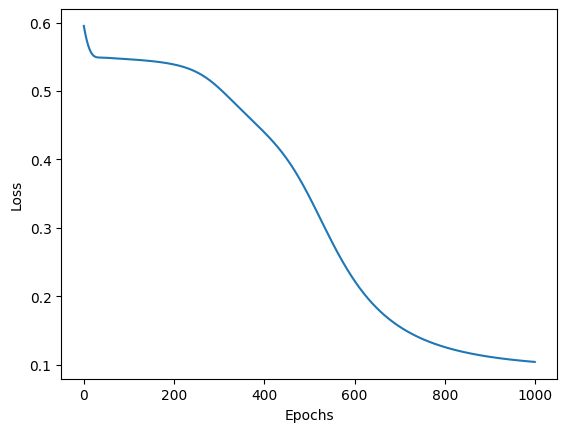

Training Losses are 
          0
0  0.743433
1  0.735114
2  0.727022
3  0.719163
4  0.711540
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3008   36]
 [ 200  756]]
Accuracy: 0.9410, Precision: 0.9545, Recall: 0.7908, F1-score: 0.8650

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3019   25]
 [ 192  764]]
Accuracy: 0.9457, Precision: 0.9683, Recall: 0.7992, F1-score: 0.8756



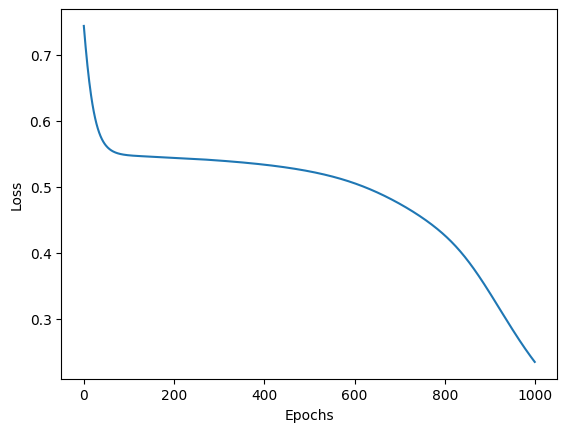

Training Losses are 
          0
0  0.650132
1  0.644404
2  0.638856
3  0.633495
4  0.628323
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[2984   60]
 [  81  875]]
Accuracy: 0.9647, Precision: 0.9358, Recall: 0.9153, F1-score: 0.9254

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3000   44]
 [  90  866]]
Accuracy: 0.9665, Precision: 0.9516, Recall: 0.9059, F1-score: 0.9282



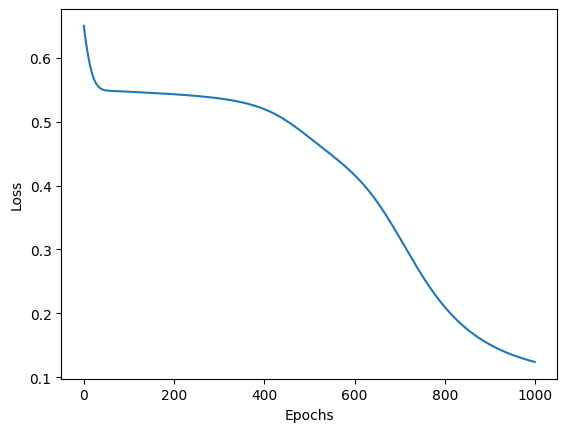

Training Losses are 
          0
0  0.752781
1  0.739706
2  0.727128
3  0.715055
4  0.703496
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[2985   59]
 [  86  870]]
Accuracy: 0.9637, Precision: 0.9365, Recall: 0.9100, F1-score: 0.9231

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3003   41]
 [  90  866]]
Accuracy: 0.9673, Precision: 0.9548, Recall: 0.9059, F1-score: 0.9297



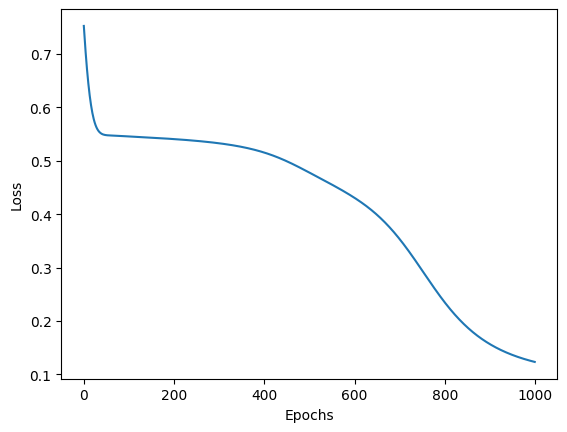

Training Losses are 
          0
0  0.643431
1  0.635177
2  0.627350
3  0.619953
4  0.612990
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[2980   64]
 [  71  885]]
Accuracy: 0.9663, Precision: 0.9326, Recall: 0.9257, F1-score: 0.9291

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[2991   53]
 [  81  875]]
Accuracy: 0.9665, Precision: 0.9429, Recall: 0.9153, F1-score: 0.9289



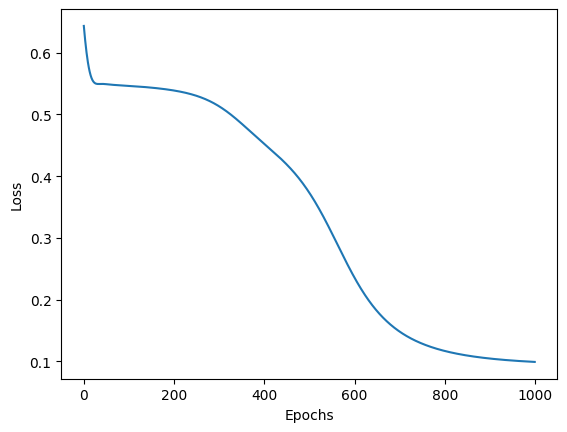

Training Losses are 
          0
0  1.009161
1  0.991071
2  0.973443
3  0.956289
4  0.939617
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3012   32]
 [ 234  722]]
Accuracy: 0.9335, Precision: 0.9576, Recall: 0.7552, F1-score: 0.8444

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3019   25]
 [ 221  735]]
Accuracy: 0.9385, Precision: 0.9671, Recall: 0.7688, F1-score: 0.8566



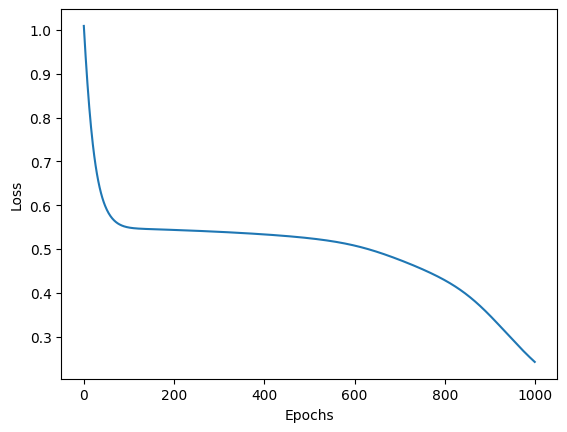

Training Losses are 
          0
0  0.676091
1  0.667118
2  0.658519
3  0.650296
4  0.642450
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[2980   64]
 [  73  883]]
Accuracy: 0.9657, Precision: 0.9324, Recall: 0.9236, F1-score: 0.9280

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[2991   53]
 [  82  874]]
Accuracy: 0.9663, Precision: 0.9428, Recall: 0.9142, F1-score: 0.9283



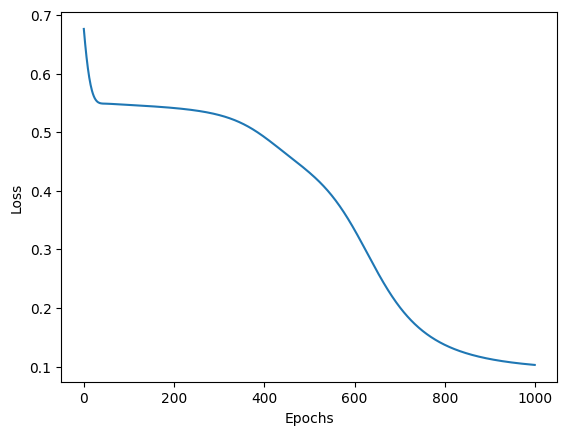

Training Losses are 
          0
0  0.634050
1  0.621725
2  0.610448
3  0.600225
4  0.591054
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[2975   69]
 [  67  889]]
Accuracy: 0.9660, Precision: 0.9280, Recall: 0.9299, F1-score: 0.9289

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[2990   54]
 [  79  877]]
Accuracy: 0.9667, Precision: 0.9420, Recall: 0.9174, F1-score: 0.9295



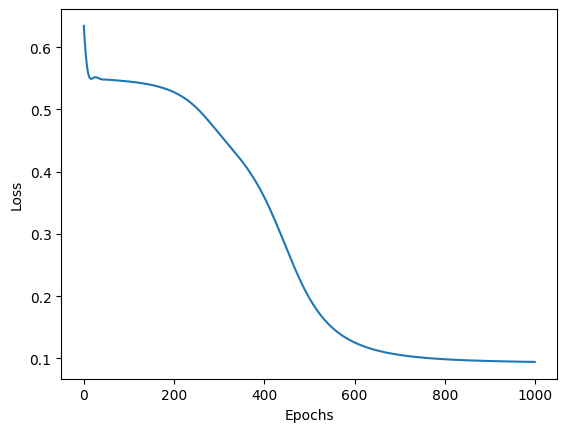

Training Losses are 
          0
0  0.710200
1  0.692232
2  0.675421
3  0.659785
4  0.645331
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[2982   62]
 [  70  886]]
Accuracy: 0.9670, Precision: 0.9346, Recall: 0.9268, F1-score: 0.9307

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[2990   54]
 [  81  875]]
Accuracy: 0.9663, Precision: 0.9419, Recall: 0.9153, F1-score: 0.9284



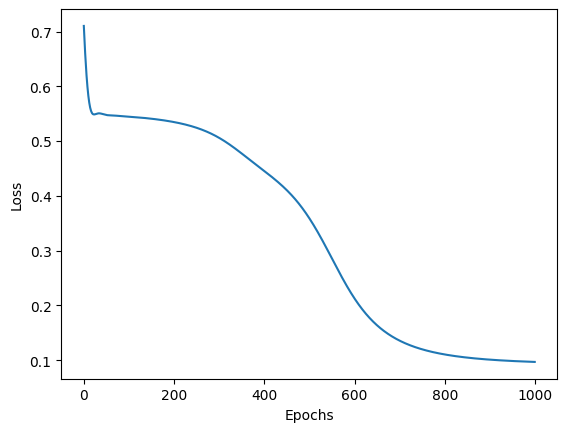

Training Losses are 
          0
0  0.749709
1  0.729817
2  0.711041
3  0.693402
4  0.676917
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[2982   62]
 [  70  886]]
Accuracy: 0.9670, Precision: 0.9346, Recall: 0.9268, F1-score: 0.9307

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[2991   53]
 [  82  874]]
Accuracy: 0.9663, Precision: 0.9428, Recall: 0.9142, F1-score: 0.9283



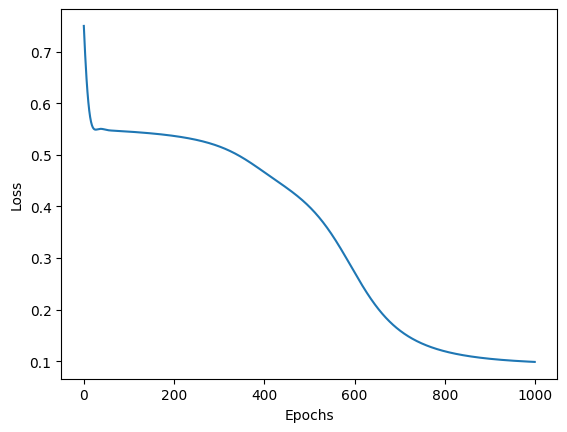

Training Losses are 
          0
0  0.634759
1  0.622248
2  0.610809
3  0.600452
4  0.591177
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[2975   69]
 [  69  887]]
Accuracy: 0.9655, Precision: 0.9278, Recall: 0.9278, F1-score: 0.9278

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[2990   54]
 [  78  878]]
Accuracy: 0.9670, Precision: 0.9421, Recall: 0.9184, F1-score: 0.9301



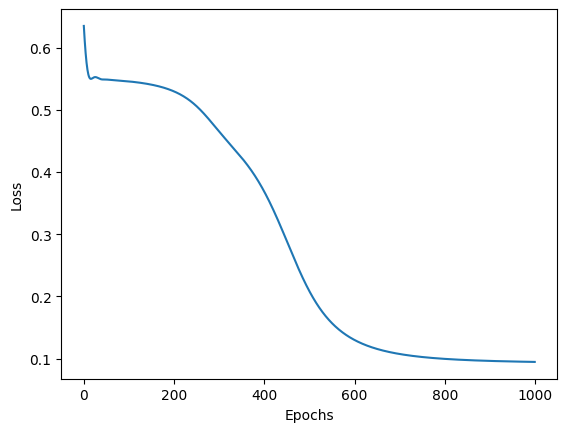

The best accuracy on test data is 0.96725 for layers 64 , 32, 8


In [21]:
nuerons = [8,16,32,64]
best_score=0
layer1=0
layer2=0
layer3=0
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(11,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.Adam(model.parameters(), lr=0.001)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      if acc > best_score:
          best_score=acc
          layer1=nueron
          layer2=double_nueron
          layer3=triple_nueron
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()
print(f"The best accuracy on test data is {best_score} for layers {layer1} , {layer2}, {layer3}")

Training Losses are 
          0
0  0.814221
1  0.810587
2  0.807003
3  0.803469
4  0.799984
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


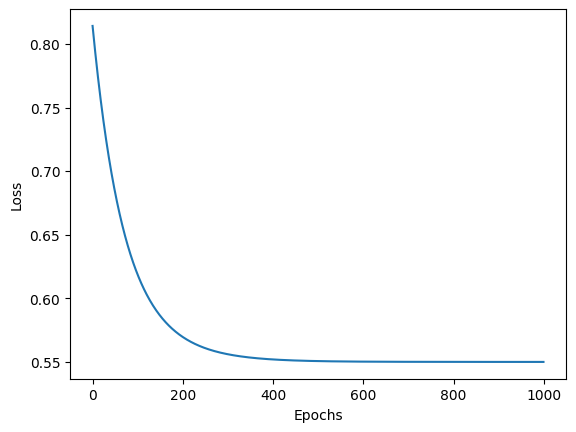

Training Losses are 
          0
0  0.678626
1  0.677035
2  0.675465
3  0.673916
4  0.672387
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


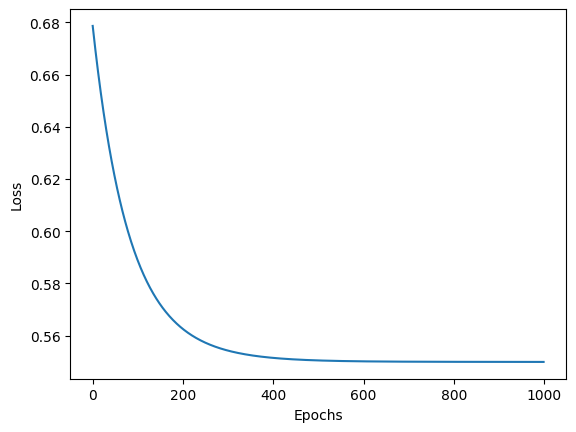

Training Losses are 
          0
0  0.909836
1  0.905220
2  0.900661
3  0.896159
4  0.891714
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


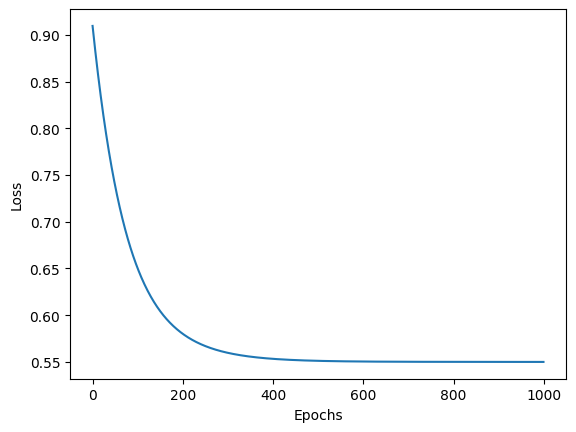

Training Losses are 
          0
0  0.730163
1  0.727757
2  0.725386
3  0.723048
4  0.720742
Validation Data
Confusion Matrix for hidden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


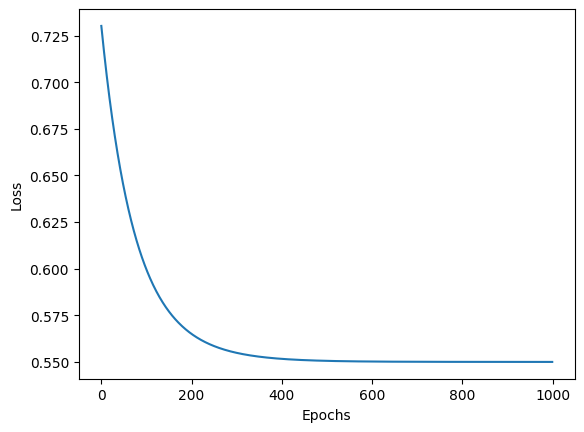

Training Losses are 
          0
0  0.744986
1  0.740189
2  0.735515
3  0.730960
4  0.726522
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


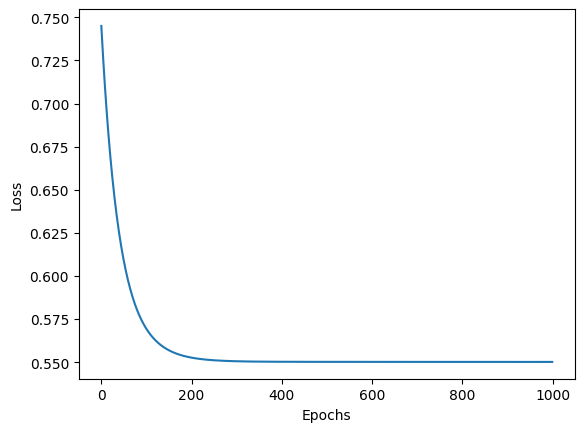

Training Losses are 
          0
0  0.670766
1  0.667794
2  0.664899
3  0.662080
4  0.659333
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


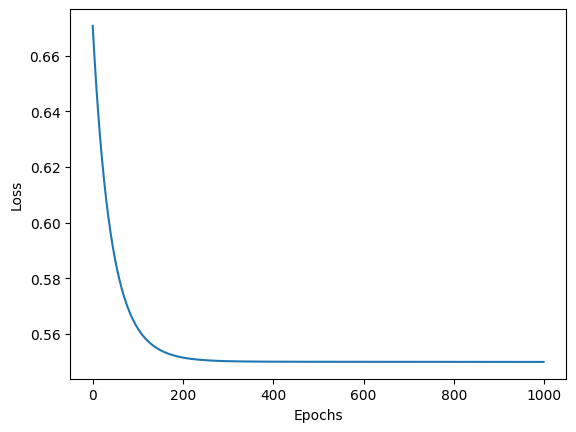

Training Losses are 
          0
0  0.665498
1  0.662731
2  0.660035
3  0.657407
4  0.654846
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


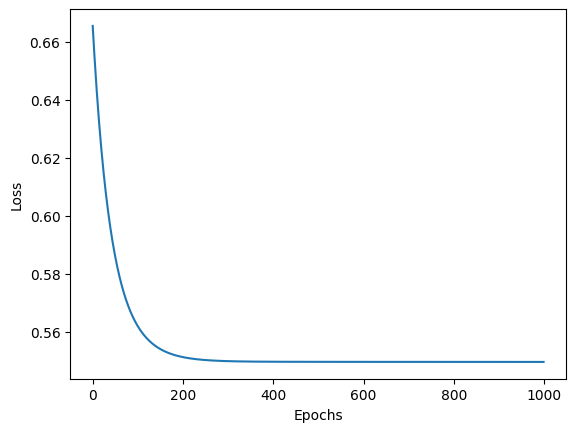

Training Losses are 
          0
0  0.685900
1  0.682602
2  0.679389
3  0.676257
4  0.673205
Validation Data
Confusion Matrix for hidden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


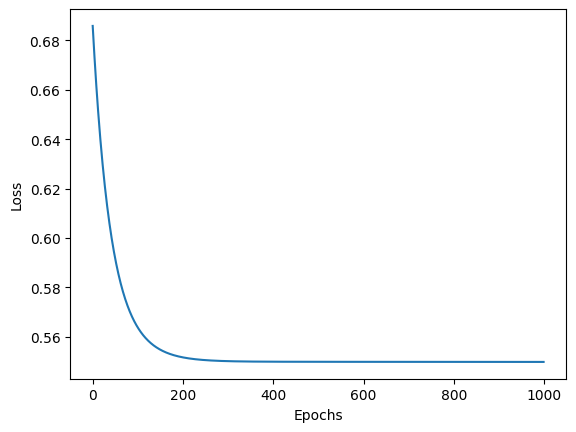

Training Losses are 
          0
0  0.627155
1  0.624465
2  0.621874
3  0.619379
4  0.616976
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


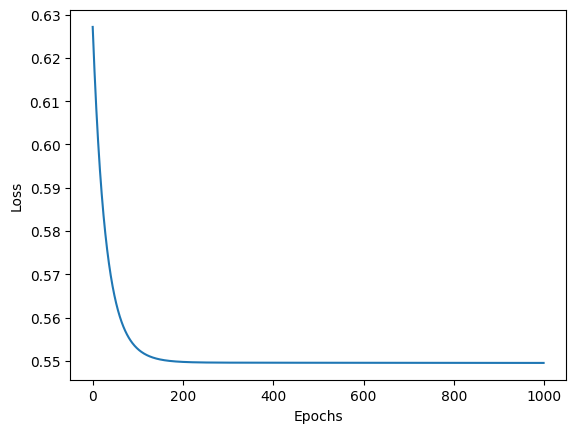

Training Losses are 
          0
0  0.598876
1  0.596904
2  0.595016
3  0.593209
4  0.591479
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


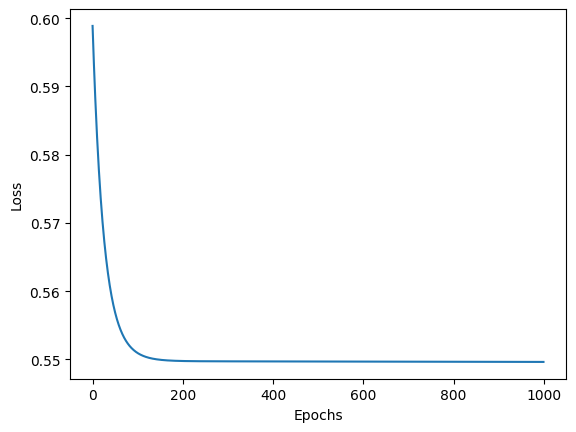

Training Losses are 
          0
0  0.651720
1  0.647206
2  0.642906
3  0.638808
4  0.634902
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


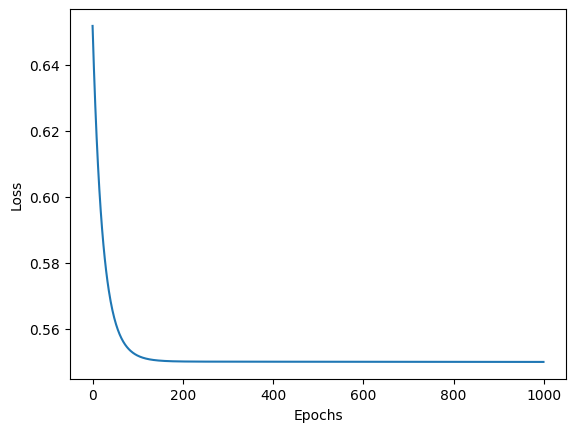

Training Losses are 
          0
0  0.763728
1  0.754030
2  0.744783
3  0.735966
4  0.727561
Validation Data
Confusion Matrix for hidden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


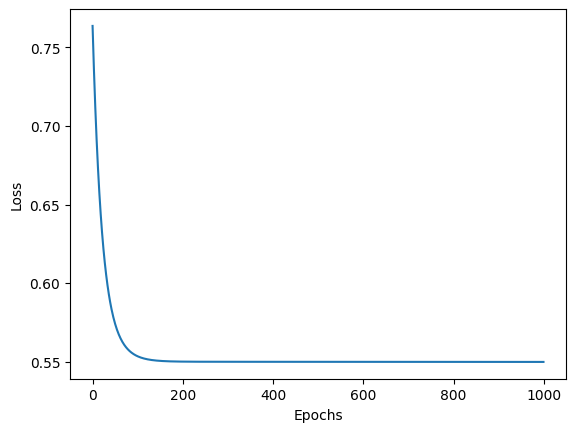

Training Losses are 
          0
0  0.660540
1  0.651886
2  0.643952
3  0.636675
4  0.629999
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


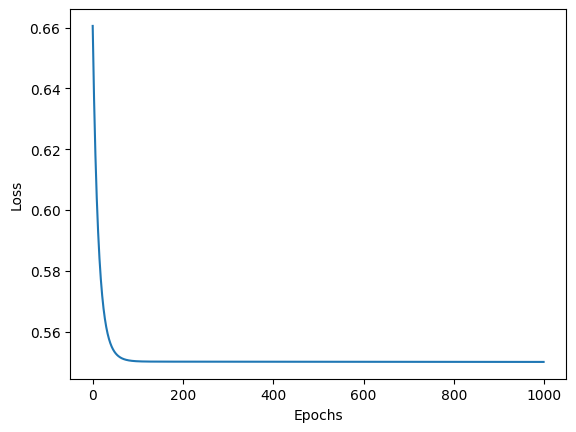

Training Losses are 
          0
0  0.675118
1  0.665352
2  0.656390
3  0.648164
4  0.640611
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


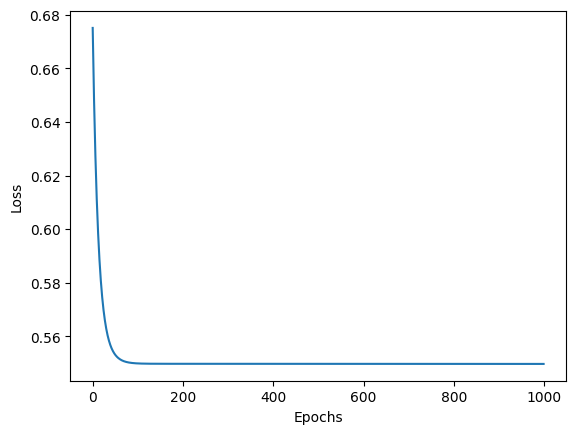

Training Losses are 
          0
0  0.662039
1  0.653291
2  0.645267
3  0.637904
4  0.631146
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


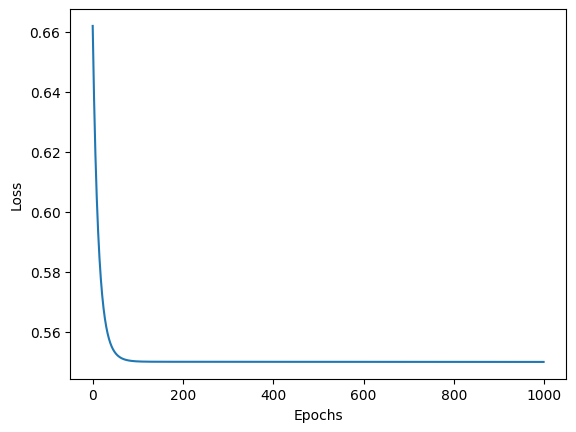

Training Losses are 
          0
0  0.773494
1  0.756276
2  0.740411
3  0.725798
4  0.712343
Validation Data
Confusion Matrix for hidden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 8 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


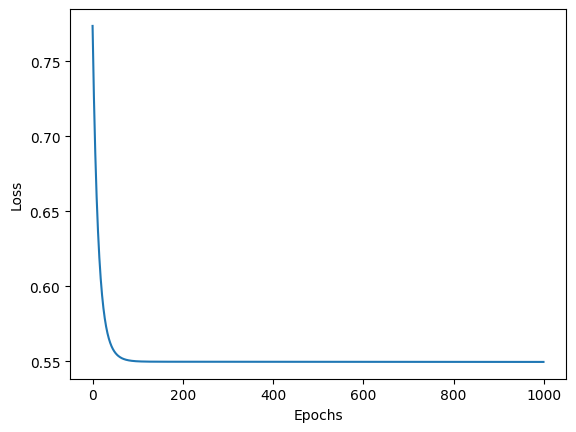

Training Losses are 
          0
0  0.592853
1  0.592295
2  0.591744
3  0.591200
4  0.590665
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


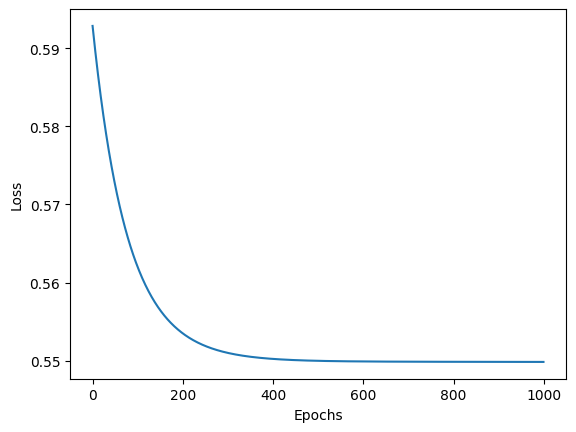

Training Losses are 
          0
0  0.703354
1  0.701115
2  0.698910
3  0.696740
4  0.694604
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


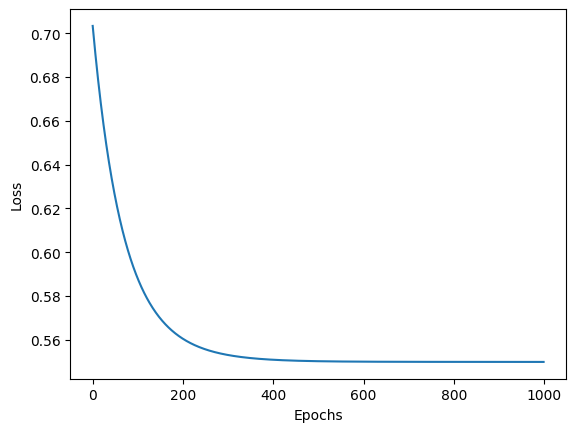

Training Losses are 
          0
0  0.668017
1  0.666428
2  0.664860
3  0.663315
4  0.661791
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


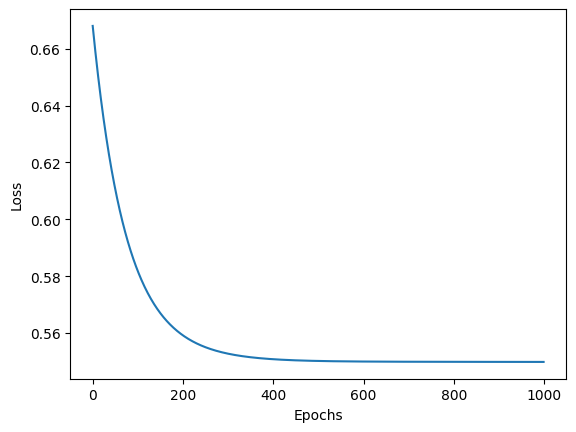

Training Losses are 
          0
0  0.857481
1  0.852720
2  0.848032
3  0.843417
4  0.838873
Validation Data
Confusion Matrix for hidden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


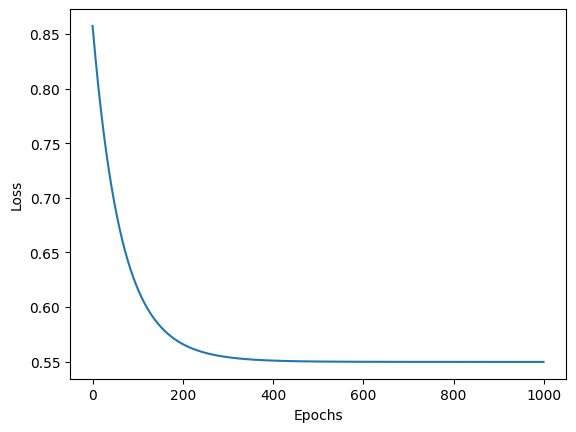

Training Losses are 
          0
0  0.660913
1  0.658138
2  0.655435
3  0.652805
4  0.650244
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


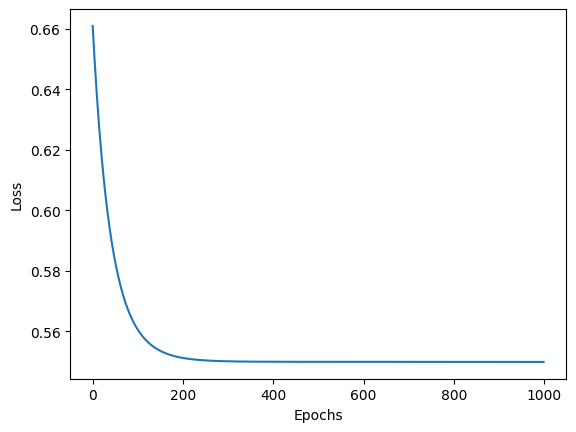

Training Losses are 
          0
0  1.093981
1  1.080543
2  1.067398
3  1.054544
4  1.041975
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


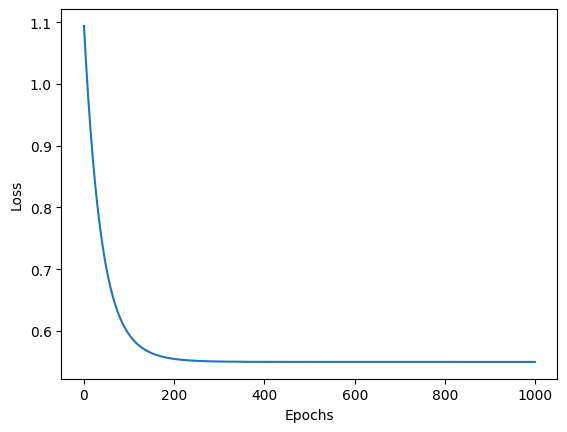

Training Losses are 
          0
0  0.578981
1  0.578366
2  0.577764
3  0.577176
4  0.576601
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


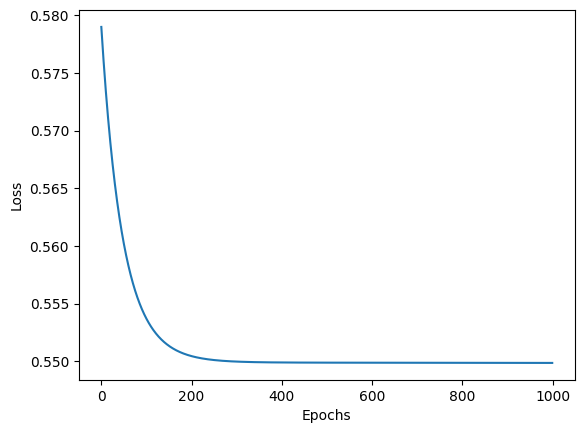

Training Losses are 
          0
0  0.793282
1  0.786738
2  0.780374
3  0.774184
4  0.768165
Validation Data
Confusion Matrix for hidden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


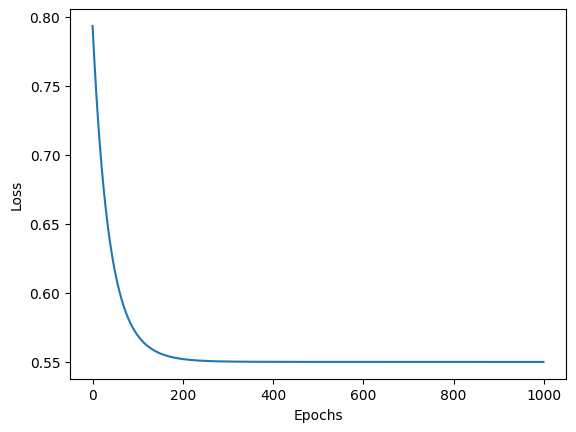

Training Losses are 
          0
0  0.572888
1  0.572039
2  0.571224
3  0.570441
4  0.569688
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


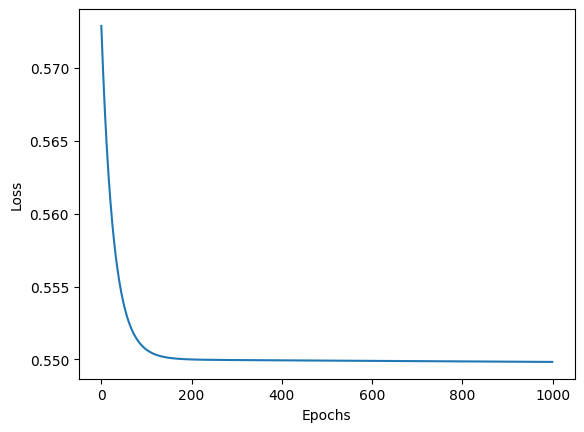

Training Losses are 
          0
0  0.645068
1  0.641375
2  0.637834
3  0.634438
4  0.631182
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


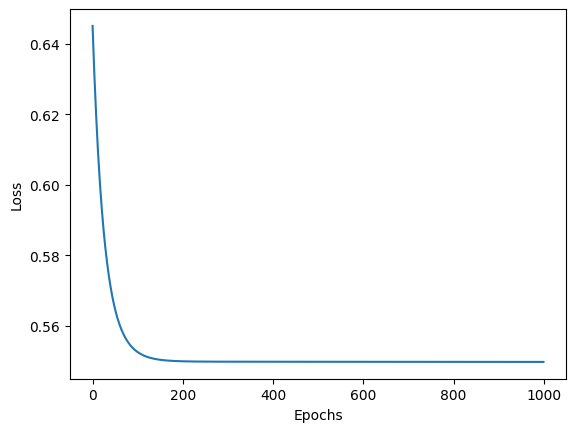

Training Losses are 
          0
0  0.667850
1  0.662530
2  0.657465
3  0.652641
4  0.648046
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


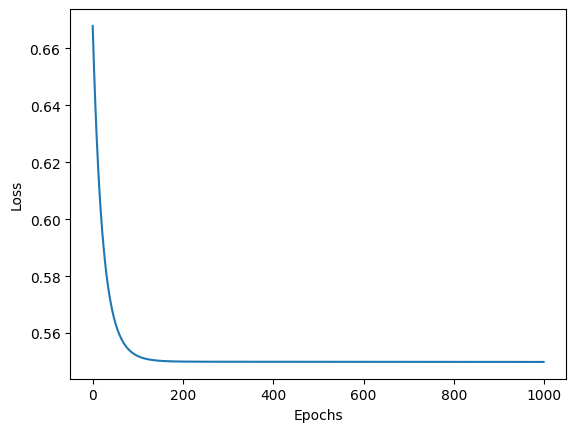

Training Losses are 
          0
0  0.666487
1  0.661162
2  0.656094
3  0.651272
4  0.646683
Validation Data
Confusion Matrix for hidden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


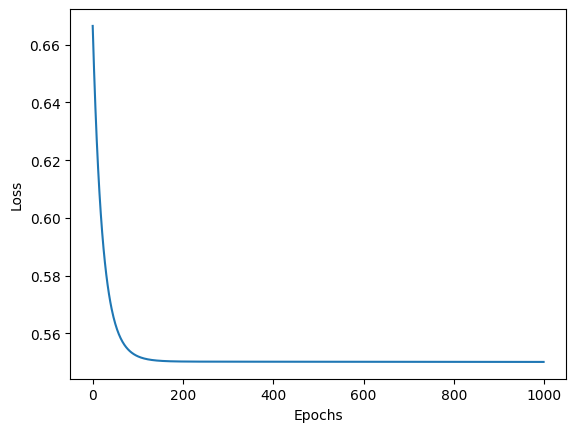

Training Losses are 
          0
0  0.625248
1  0.619387
2  0.614010
3  0.609073
4  0.604540
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


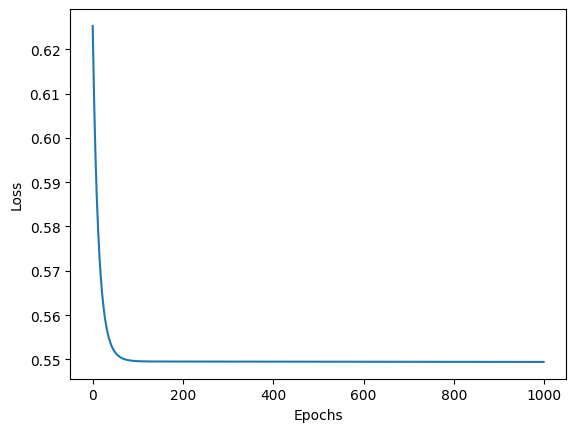

Training Losses are 
          0
0  0.631523
1  0.624991
2  0.619017
3  0.613552
4  0.608550
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


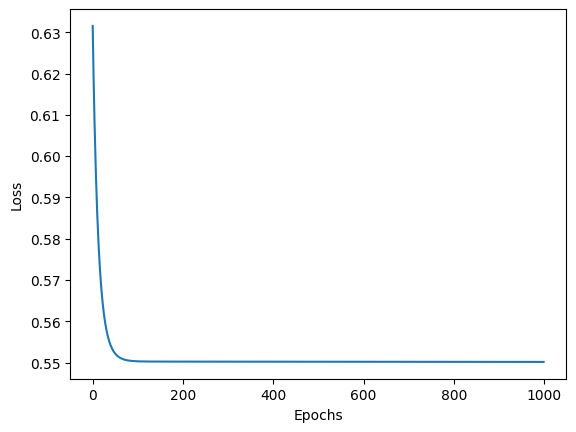

Training Losses are 
          0
0  0.775478
1  0.756362
2  0.738897
3  0.722950
4  0.708393
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


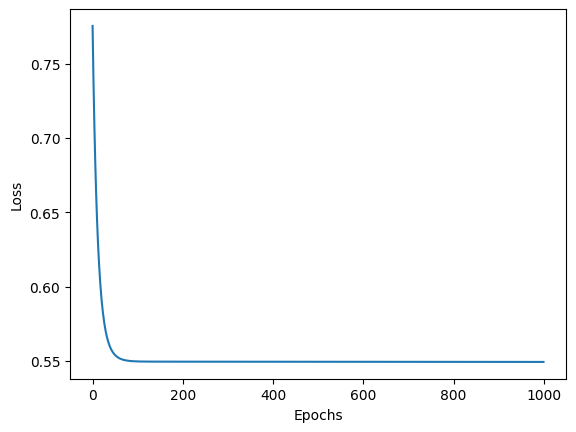

Training Losses are 
          0
0  0.634487
1  0.627810
2  0.621694
3  0.616088
4  0.610947
Validation Data
Confusion Matrix for hidden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 16 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


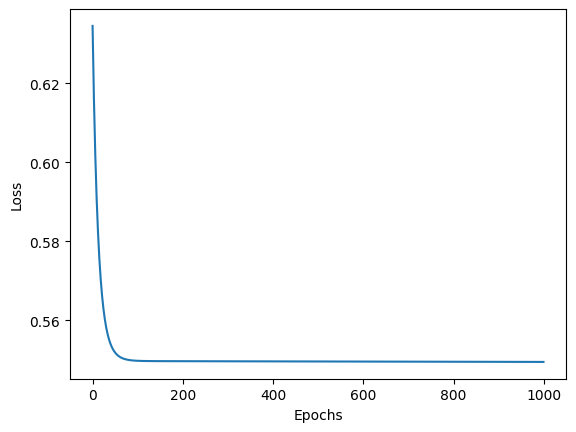

Training Losses are 
          0
0  0.768355
1  0.764820
2  0.761344
3  0.757924
4  0.754561
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


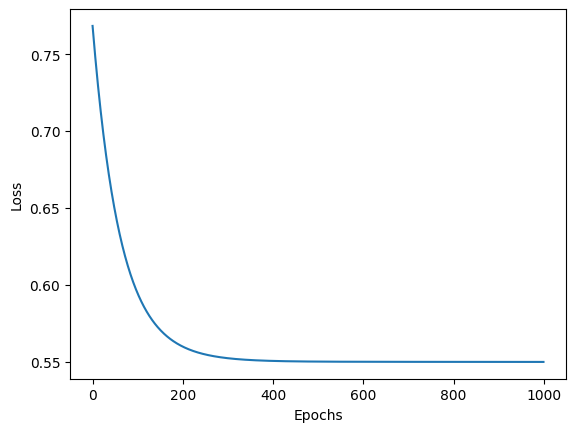

Training Losses are 
          0
0  0.679655
1  0.677935
2  0.676240
3  0.674568
4  0.672919
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


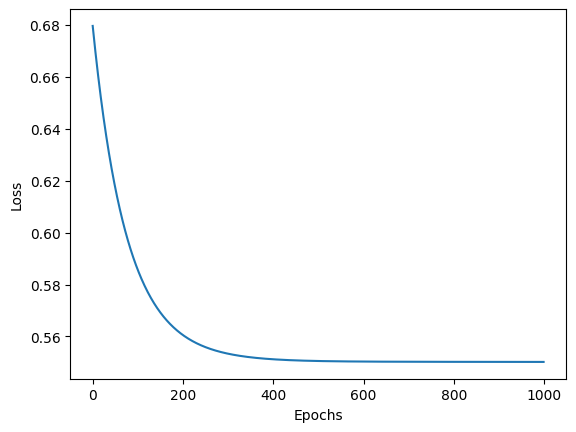

Training Losses are 
          0
0  0.639695
1  0.638475
2  0.637273
3  0.636088
4  0.634920
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


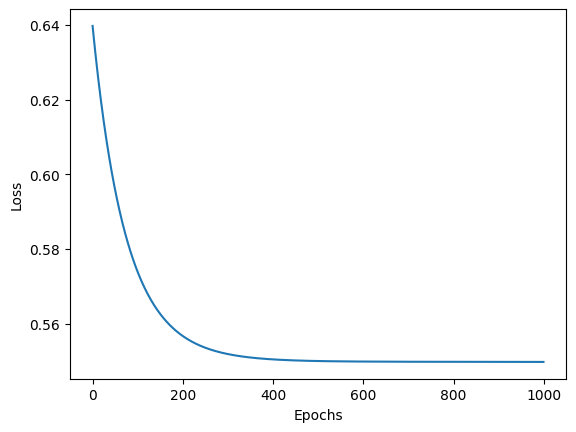

Training Losses are 
          0
0  0.641491
1  0.640086
2  0.638703
3  0.637343
4  0.636005
Validation Data
Confusion Matrix for hidden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


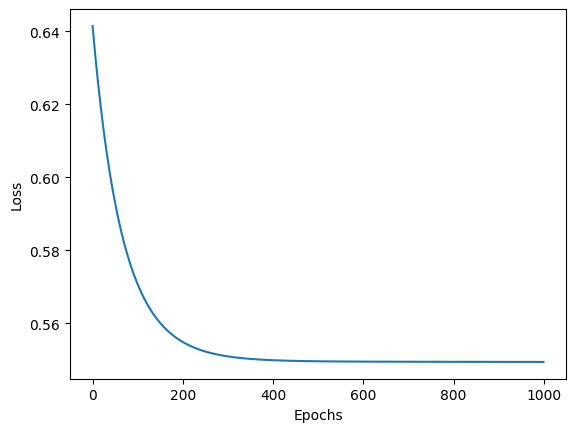

Training Losses are 
          0
0  0.772333
1  0.766680
2  0.761175
3  0.755813
4  0.750593
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


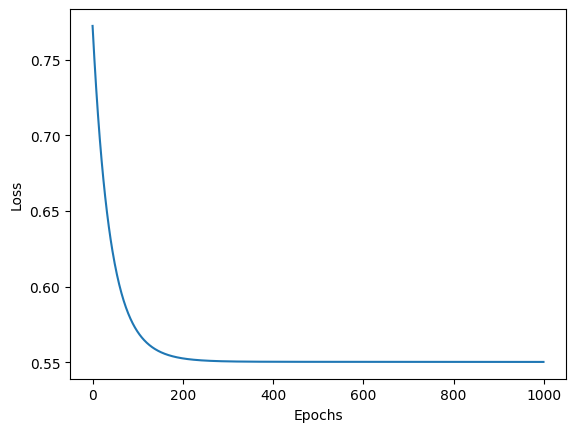

Training Losses are 
          0
0  0.689564
1  0.685766
2  0.682077
3  0.678493
4  0.675012
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


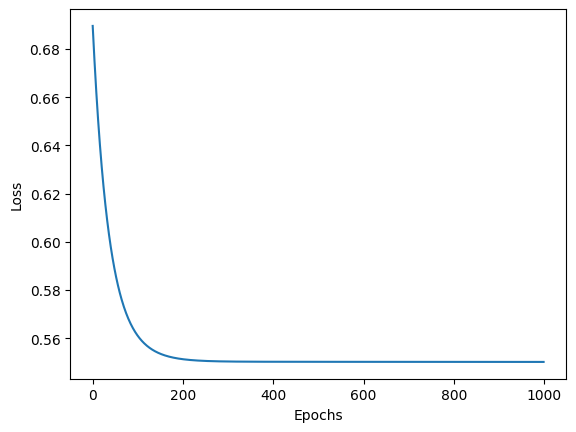

Training Losses are 
          0
0  0.630467
1  0.628388
2  0.626366
3  0.624399
4  0.622486
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


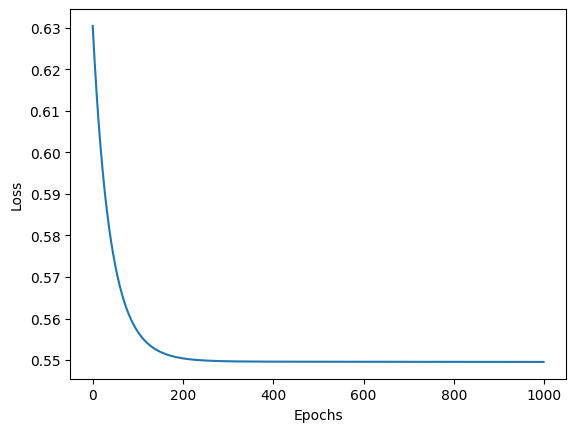

Training Losses are 
          0
0  0.644972
1  0.642615
2  0.640319
3  0.638085
4  0.635909
Validation Data
Confusion Matrix for hidden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


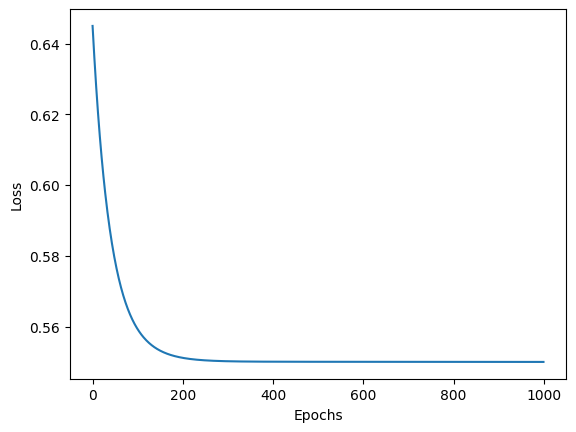

Training Losses are 
          0
0  0.738131
1  0.730089
2  0.722404
3  0.715058
4  0.708039
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


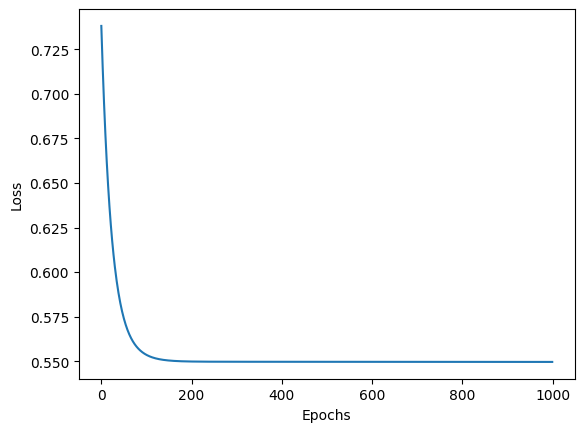

Training Losses are 
          0
0  0.798493
1  0.787494
2  0.776988
3  0.766953
4  0.757370
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


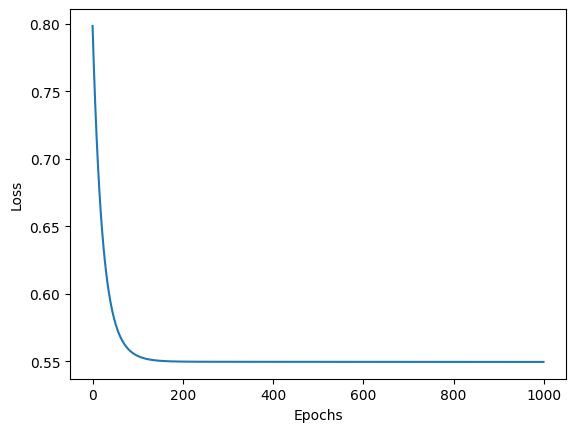

Training Losses are 
          0
0  0.634924
1  0.631253
2  0.627751
3  0.624409
4  0.621220
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


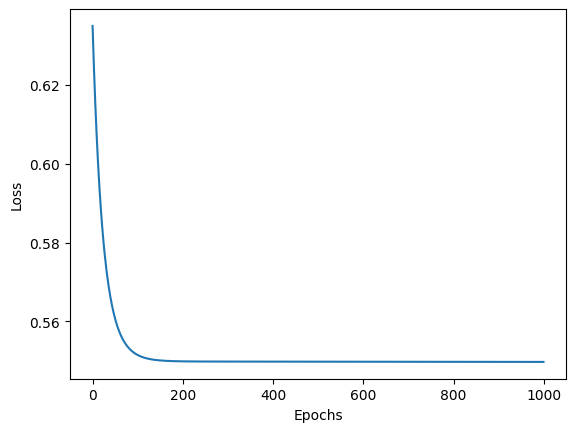

Training Losses are 
          0
0  0.762556
1  0.753127
2  0.744127
3  0.735537
4  0.727339
Validation Data
Confusion Matrix for hidden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


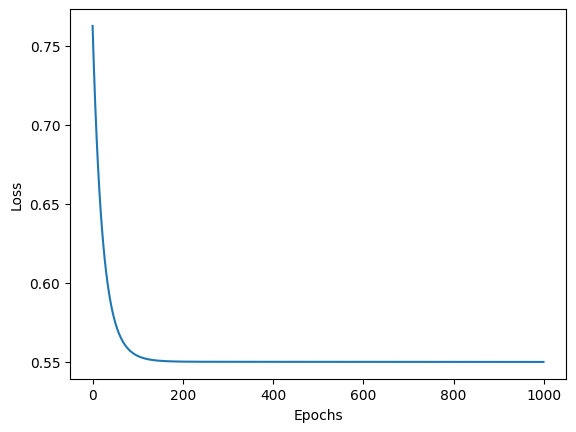

Training Losses are 
          0
0  0.677570
1  0.666678
2  0.656768
3  0.647749
4  0.639538
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


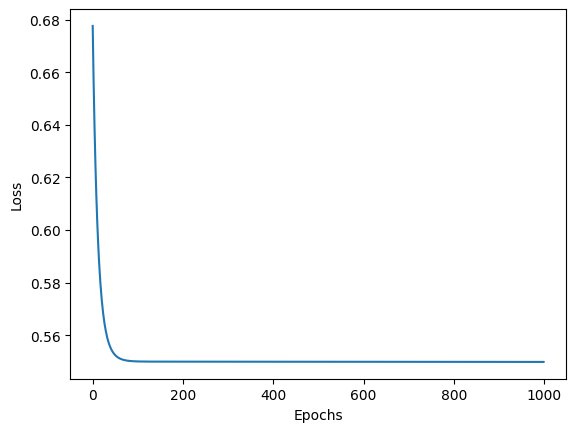

Training Losses are 
          0
0  0.674361
1  0.664903
2  0.656206
3  0.648206
4  0.640847
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


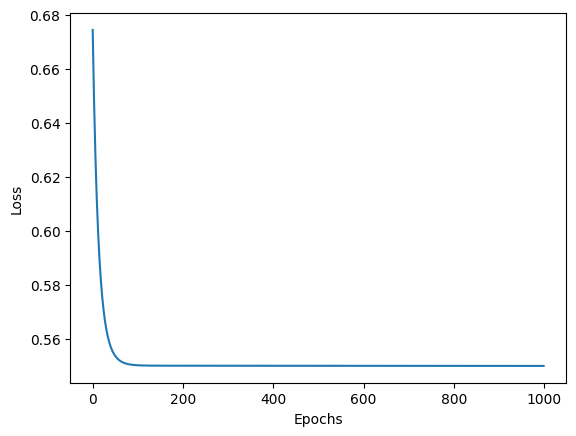

Training Losses are 
          0
0  0.656802
1  0.647729
2  0.639474
3  0.631960
4  0.625117
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


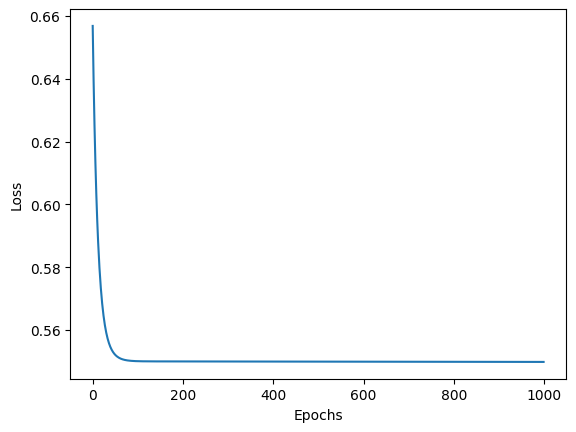

Training Losses are 
          0
0  0.707046
1  0.693743
2  0.681617
3  0.670563
4  0.660485
Validation Data
Confusion Matrix for hidden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 32 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


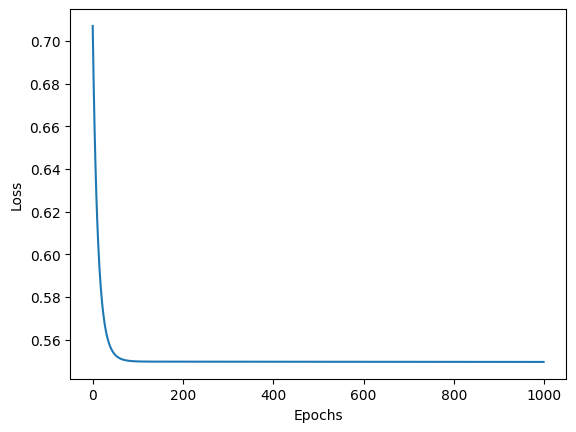

Training Losses are 
          0
0  0.612957
1  0.611964
2  0.610986
3  0.610024
4  0.609078
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


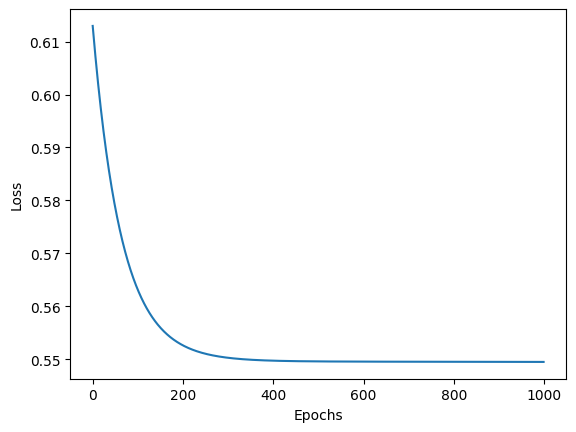

Training Losses are 
          0
0  0.748641
1  0.745514
2  0.742435
3  0.739406
4  0.736425
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


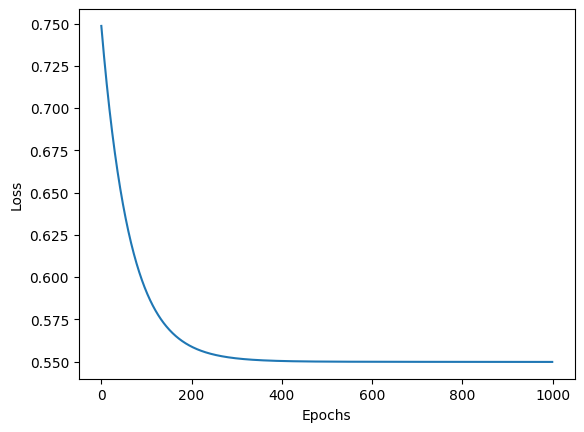

Training Losses are 
          0
0  0.686382
1  0.684078
2  0.681813
3  0.679588
4  0.677400
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


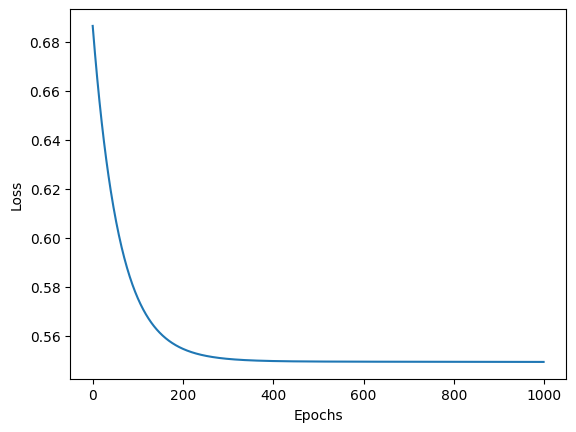

Training Losses are 
          0
0  0.776764
1  0.772428
2  0.768178
3  0.764012
4  0.759930
Validation Data
Confusion Matrix for hidden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 8 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


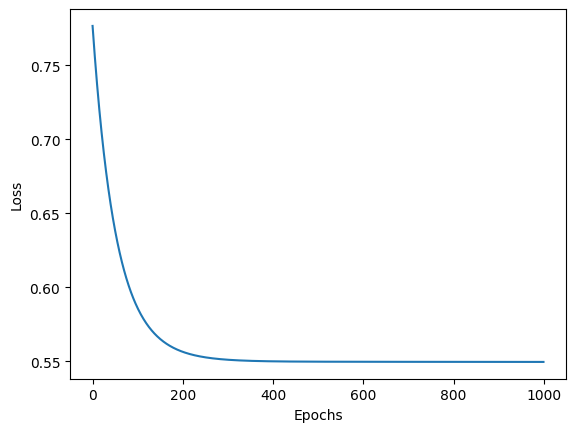

Training Losses are 
          0
0  0.668507
1  0.665584
2  0.662738
3  0.659966
4  0.657266
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


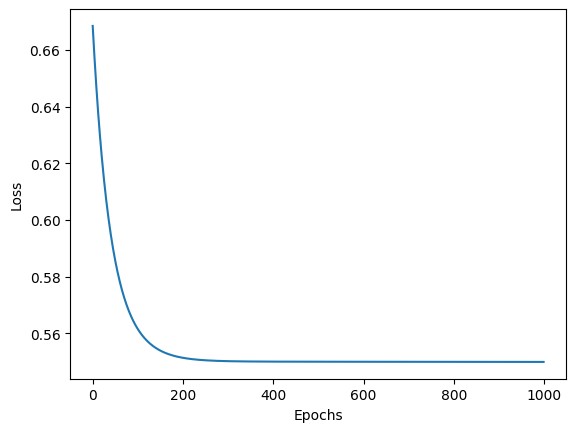

Training Losses are 
          0
0  0.706953
1  0.702722
2  0.698612
3  0.694620
4  0.690741
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


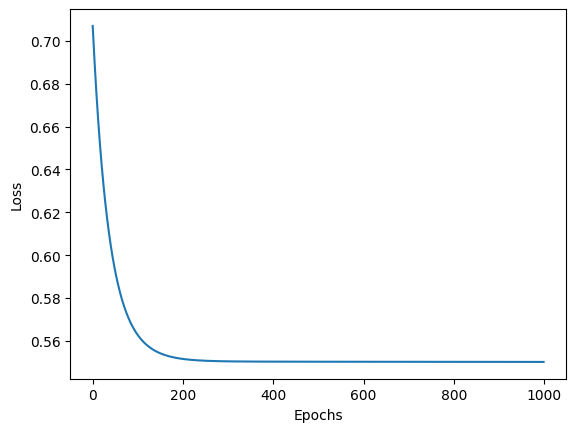

Training Losses are 
          0
0  0.710376
1  0.706363
2  0.702455
3  0.698648
4  0.694942
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


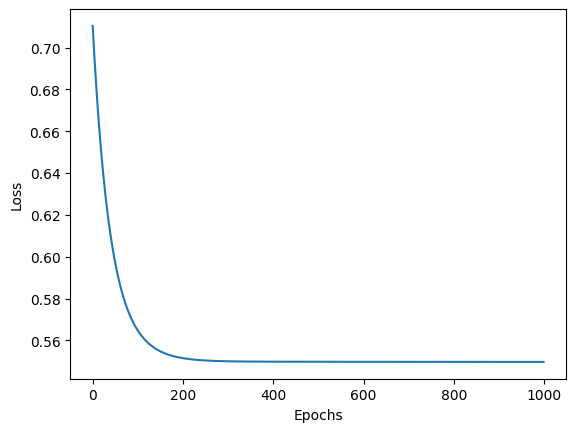

Training Losses are 
          0
0  0.855013
1  0.846611
2  0.838442
3  0.830502
4  0.822784
Validation Data
Confusion Matrix for hidden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 16 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


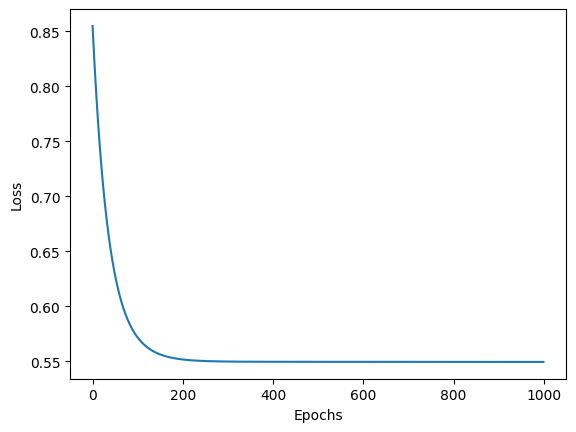

Training Losses are 
          0
0  0.666046
1  0.660802
2  0.655808
3  0.651052
4  0.646524
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


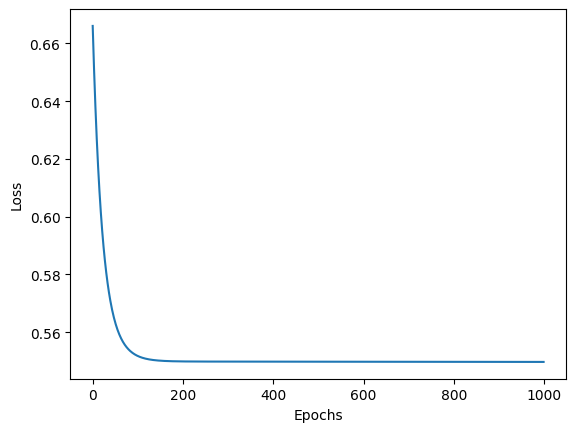

Training Losses are 
          0
0  0.631404
1  0.627759
2  0.624286
3  0.620979
4  0.617829
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


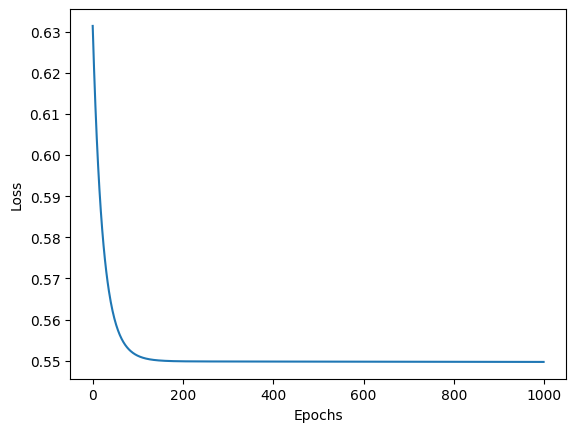

Training Losses are 
          0
0  0.626491
1  0.623360
2  0.620364
3  0.617499
4  0.614758
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


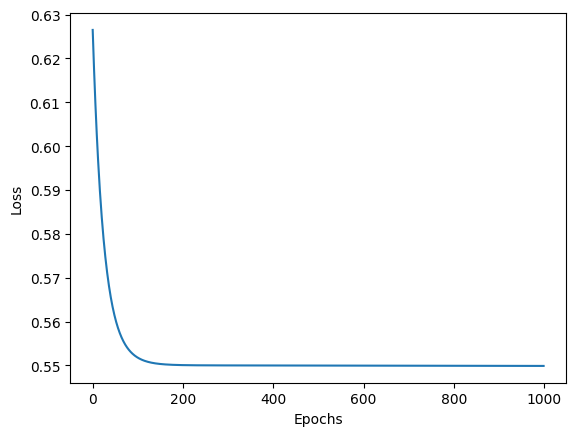

Training Losses are 
          0
0  0.831446
1  0.819190
2  0.807470
3  0.796264
4  0.785553
Validation Data
Confusion Matrix for hidden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 32 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


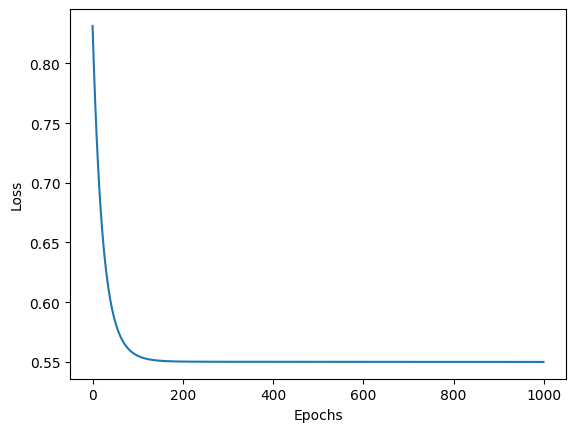

Training Losses are 
          0
0  0.720697
1  0.706403
2  0.693354
3  0.681442
4  0.670567
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 8
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


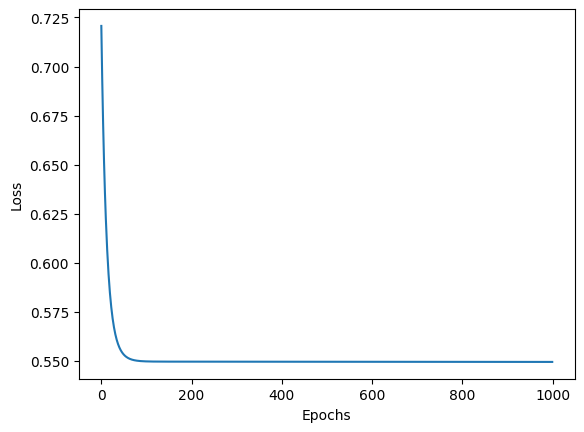

Training Losses are 
          0
0  0.710634
1  0.697483
2  0.685462
3  0.674472
4  0.664425
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 16
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


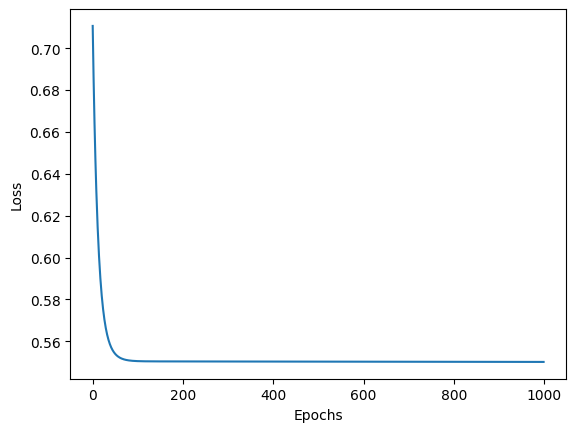

Training Losses are 
          0
0  0.636334
1  0.629386
2  0.623034
3  0.617226
4  0.611912
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 32
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


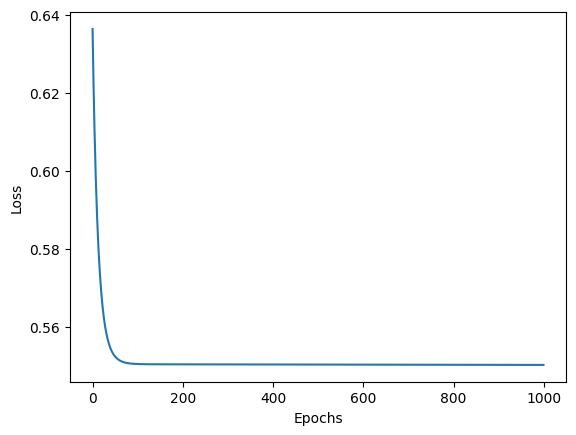

Training Losses are 
          0
0  0.887372
1  0.860813
2  0.836290
3  0.813674
4  0.792838
Validation Data
Confusion Matrix for hidden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000

Test Data
Confusion Matrix for hiden layer 64 and 64 and 64
[[3044    0]
 [ 956    0]]
Accuracy: 0.7610, Precision: 0.0000, Recall: 0.0000, F1-score: 0.0000



/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/abhij/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


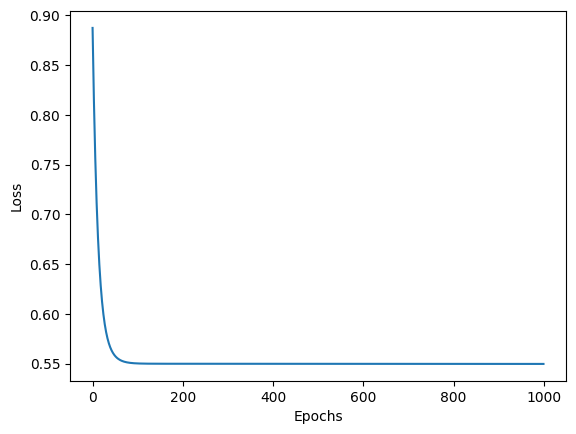

In [22]:
nuerons = [8,16,32,64]
for nueron in nuerons:
  for double_nueron in nuerons:
    for triple_nueron in nuerons:
      model = DoubleLayer(11,nueron,double_nueron)
      criterion = nn.BCELoss() #Binary Classifiaction Loss
      optimizer = optim.SGD(model.parameters(), lr=0.01)
      epochs=1000
      loss_arr=[]
      for i in range(epochs):
            optimizer.zero_grad()
            model.train()
            outputs=model(X_train)
            outputs = outputs.view(-1, 1)
            loss = criterion(outputs, y_train.float())
            loss_arr.append(loss.detach().numpy())
            loss.backward()
            optimizer.step()
      print("Training Losses are ")
      loss_df = pd.DataFrame(loss_arr)
      print(loss_df.head())
      y_val_pred=model(X_val)
      y_val_pred=(y_val_pred>0.5).float()
      cm = confusion_matrix(y_val, y_val_pred)
      acc = accuracy_score(y_val, y_val_pred)
      precision = precision_score(y_val.numpy(), y_val_pred.numpy())
      recall = recall_score(y_val.numpy(), y_val_pred.numpy())
      f1 = f1_score(y_val.numpy(), y_val_pred.numpy())
      print("Validation Data")
      print(f"Confusion Matrix for hidden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      y_test_pred=model(X_test)
      y_test_pred=(y_test_pred>0.5).float()
      cm = confusion_matrix(y_test, y_test_pred)
      acc = accuracy_score(y_test, y_test_pred)
      precision = precision_score(y_test.numpy(), y_test_pred.numpy())
      recall = recall_score(y_test.numpy(), y_test_pred.numpy())
      f1 = f1_score(y_test.numpy(), y_test_pred.numpy())
      print("Test Data")
      print(f"Confusion Matrix for hiden layer {nueron} and {double_nueron} and {triple_nueron}")
      print(cm)
      print(f"Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}\n")
      plt.plot(range(epochs), loss_arr)
      plt.xlabel('Epochs')
      plt.ylabel('Loss')
      plt.show()